In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re

In [2]:
df=pd.read_csv('/home/diplopia/excel analyze/data/노블컴퍼니5(기여도전쟁_내역_2024092910.csv')
df=df.fillna(value=str(0))
df['후원시간'] = pd.to_datetime(df['후원시간'])
df['hour'] = df['후원시간'].dt.hour
df['hour'] = [str(i) for i in df['hour']]
df['day'] = df['후원시간'].dt.day
re_df = df[(df['참여BJ'] != '노블컴퍼니(대표BJ)') & (df['참여BJ'] != '콩승아') & (df['참여BJ'] != '0') & (df['후원하트']>=100)]


In [3]:
vip_list=[]
for i in re_df['후원 아이디(닉네임)']:
    vip_list.append(i.split('(')[1][:-1])

re_df['후원 아이디(닉네임)']=vip_list

/tmp/ipykernel_68045/8002336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_df['후원 아이디(닉네임)']=vip_list


In [4]:
re_df

,후원시간,후원 아이디(닉네임),후원하트,참여BJ,하트점수,기여도,기타,hour,day
0,2024-09-23 03:06:19,⭐금지™,1011,지원,1011,1011,0,3,23
1,2024-09-23 03:06:04,⭐금지™,1011,밍밍,1011,1011,0,3,23
3,2024-09-23 03:00:28,눈먼천사,10000,바니빈,10000,30000,수정,3,23
4,2024-09-23 02:58:13,⭐금지™,9999,클라라,9999,29997,수정,2,23
5,2024-09-23 02:57:56,⭐금지™,2482,클라라,2482,7446,수정,2,23
...,...,...,...,...,...,...,...,...,...
385,2024-09-22 15:19:23,이제수하없이못사는ღ샤린,3333,수하,3333,6666,수정,15,22
387,2024-09-22 15:16:59,*⛧★⭐동탄큰손➷,999,정윤슬,999,999,0,15,22
388,2024-09-22 15:16:49,*⛧★⭐동탄큰손➷,999,소야,999,999,0,15,22
389,2024-09-22 15:16:31,이제수하없이못사는ღ샤린,999,수하,999,999,0,15,22


## 1. 출연자별 총 하트 합계 그래프

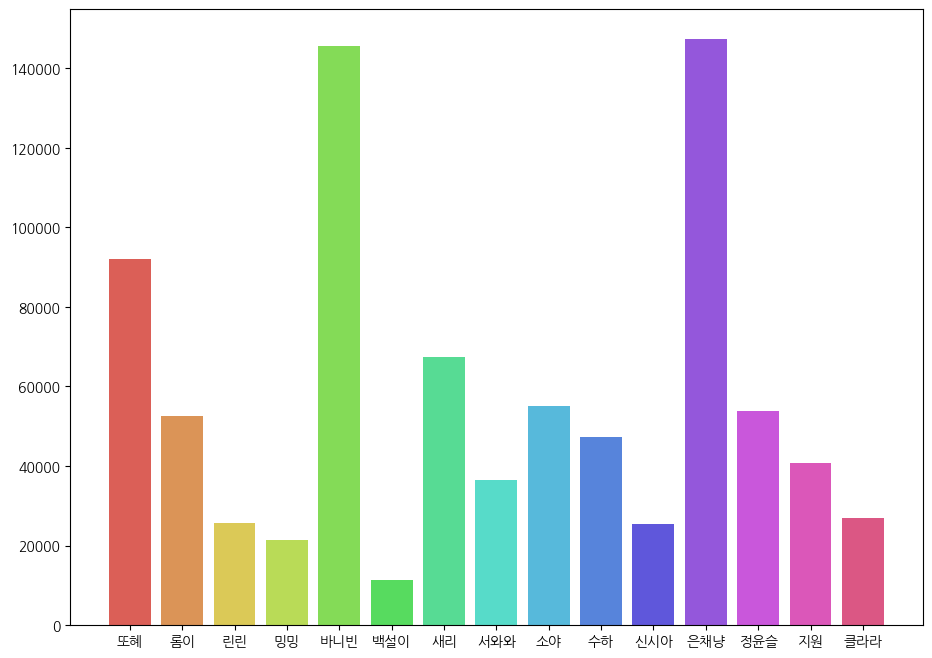

In [5]:
BJ_list = sorted(list(set(re_df['참여BJ'])))

BJ_hearts=[]
for i in BJ_list:
    hearts = re_df[re_df['참여BJ']==i]['후원하트'].sum()
    BJ_hearts.append(hearts)

# plt.rc('font',family='NanumGothic')
colors = sns.color_palette('hls',len(BJ_hearts))
plt.figure(figsize=(11,8))
plt.bar(BJ_list,BJ_hearts,color=colors)
plt.show()

### 1-1. 출연자가 받은 하트 통계

In [6]:
#1회차 BJ 평균
avg = sum(BJ_hearts)/len(BJ_list)
median = np.median(BJ_hearts)
max = np.max(BJ_hearts)
min = np.min(BJ_hearts)
lower25 = np.percentile(BJ_hearts,25,interpolation = 'nearest')
higher25 = np.percentile(BJ_hearts,75, interpolation = 'nearest')
print('평균 : ',round(avg), '\n중위값 : ',median, '\n하위25% : ',lower25, '\n상위25% : ',higher25, '\n최대값 : ',max, '\n최솟값 : ',min)

평균 :  56618 
중위값 :  47182.0 
하위25% :  26914 
상위25% :  55139 
최대값 :  147442 
최솟값 :  11269


## 2. 시청자별 총 하트 하계 그래프

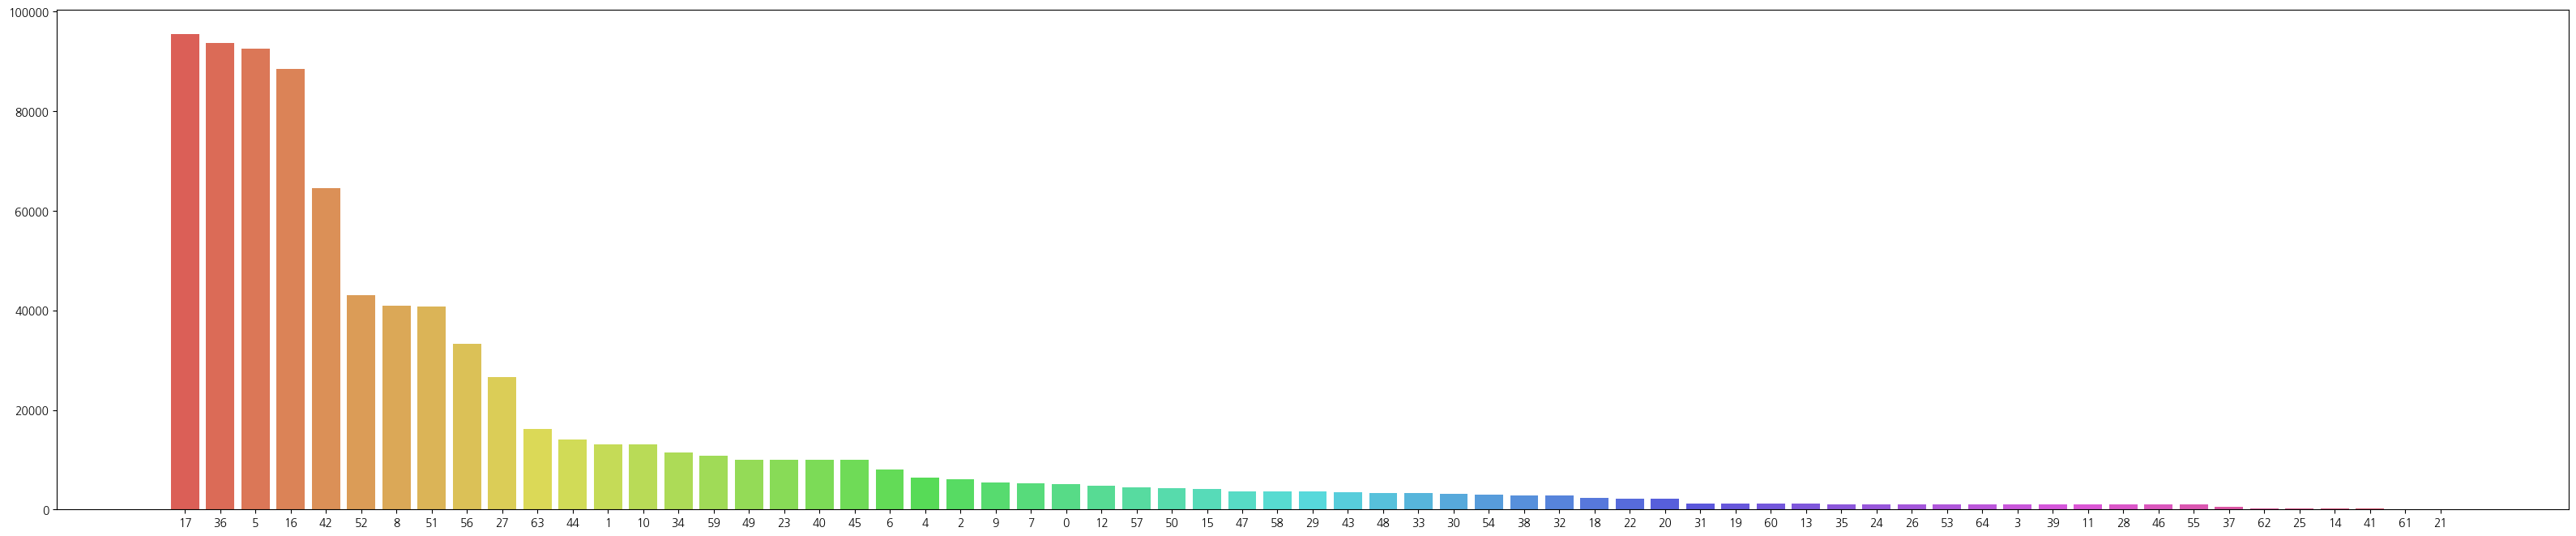

In [7]:
VIP_list = sorted(list(set(re_df['후원 아이디(닉네임)'])))

VIP_hearts=[]
for i in VIP_list:
    hearts = re_df[re_df['후원 아이디(닉네임)']==i]['후원하트'].sum()
    VIP_hearts.append(hearts)

new_df = pd.DataFrame({'ID':[str(i) for i in range(len(VIP_list))],
                        'vip_name':VIP_list,
                       'hearts':VIP_hearts})

sort_df = new_df.sort_values('hearts',ascending=False)
# for i,j in zip(VIP_list,VIP_hearts):
#     print(i,j)
# list(sort_df.index)
colors = sns.color_palette('hls',len(VIP_hearts))
plt.figure(figsize=(40,8))
plt.bar(sort_df['ID'],sort_df['hearts'],color=colors)
plt.show()
# sns.barplot(data=sort_df,x='ID',y='hearts',order=sort_df.sort_values('hearts'))

### 2-1. 시청자가 후원한 하트 통계

In [8]:
#1회차 시청자 평균
avg = sum(VIP_hearts)/len(VIP_list)
median = np.median(VIP_hearts)
max = np.max(VIP_hearts)
min = np.min(VIP_hearts)
lower25 = np.percentile(VIP_hearts,25,interpolation = 'nearest')
higher25 = np.percentile(VIP_hearts,75, interpolation = 'nearest')
print('평균 : ',round(avg), '\n중위값 : ',median, '\n하위25% : ',lower25, '\n상위25% : ',higher25, '\n최대값 : ',max, '\n최솟값 : ',min)

평균 :  13066 
중위값 :  3678.0 
하위25% :  1044 
상위25% :  10000 
최대값 :  95568 
최솟값 :  100


### 2-2. 후원을 많이한 시청자 Rank17

In [9]:
sort_df[:17]

,ID,vip_name,hearts
17,17,✦백야✦™,95568
36,36,눈먼천사,93639
5,5,ZO지GO,92571
16,16,♥BOHEM,88556
42,42,붘칰밬칰,64549
52,52,이제수하없이못사는ღ샤린,43001
8,8,ღ롬이ღ아크,41009
51,51,은채궁에하트터는김루팡,40788
56,56,지나가버린사람,33318
27,27,⭐금지™,26586


In [10]:
time_df = re_df.groupby(['day','hour'])['후원하트'].sum().reset_index()
# time_df['hour']=[str(i) for i in time_df['hour']]


In [11]:
time_df

,day,hour,후원하트
0,22,15,13657
1,22,16,94621
2,22,17,40098
3,22,18,104159
4,22,19,71687
5,22,20,115280
6,22,21,52080
7,22,22,86307
8,22,23,90530
9,23,0,70658


## 3. 시간별 총 하트 합계 그래프

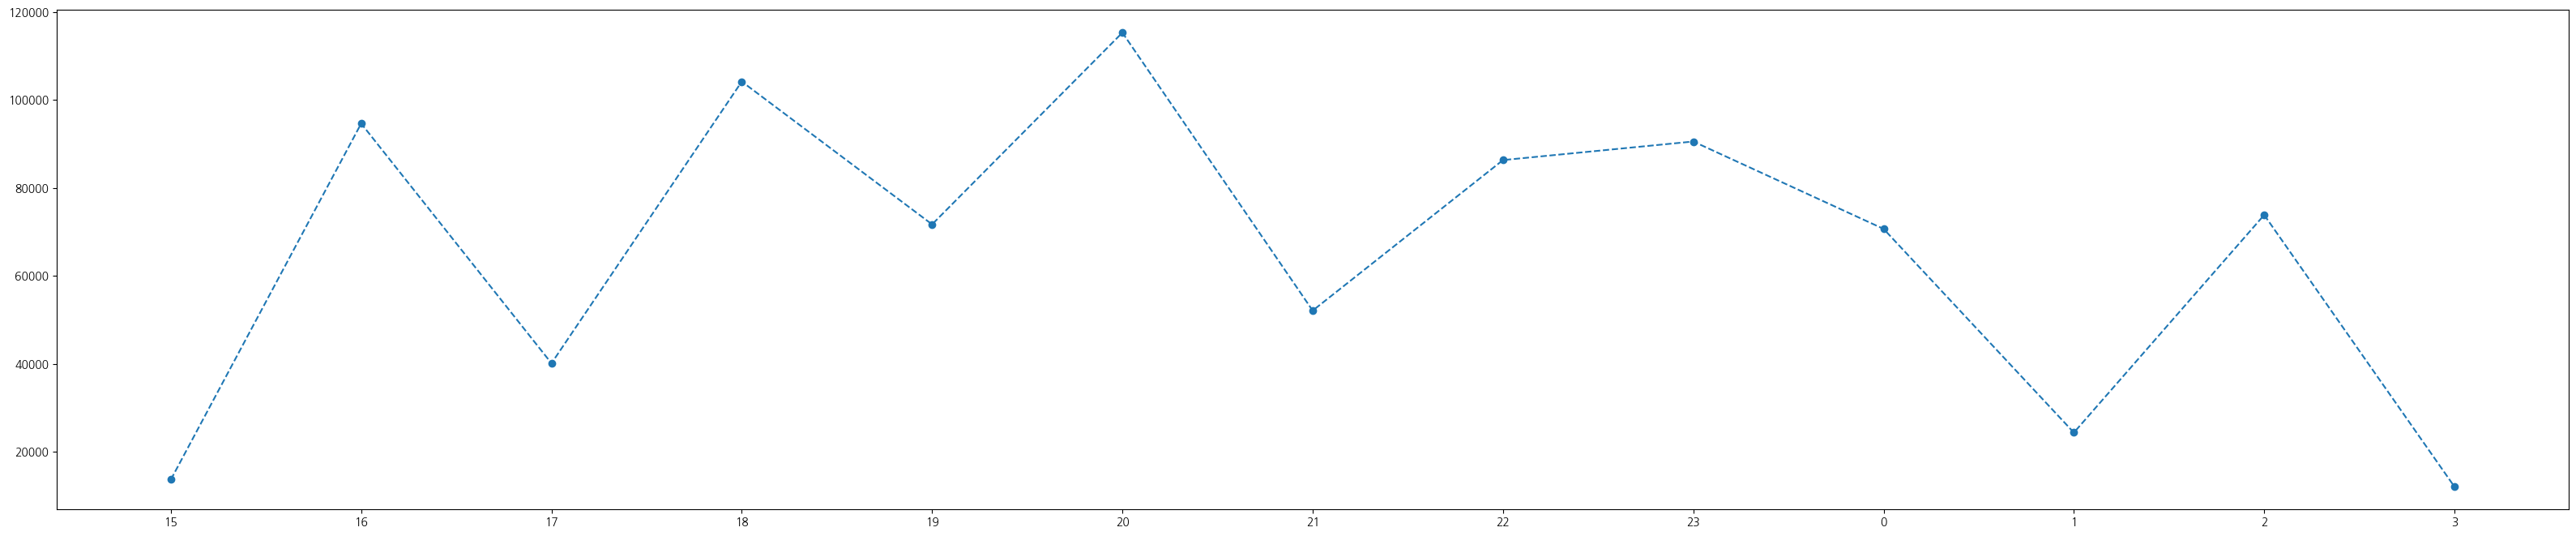

In [12]:
plt.figure(figsize=(40,8))
plt.plot(time_df['hour'],time_df['후원하트'],linestyle='--',marker='o')
plt.show()

## 4. 출연자별 하트 시계열 그래프

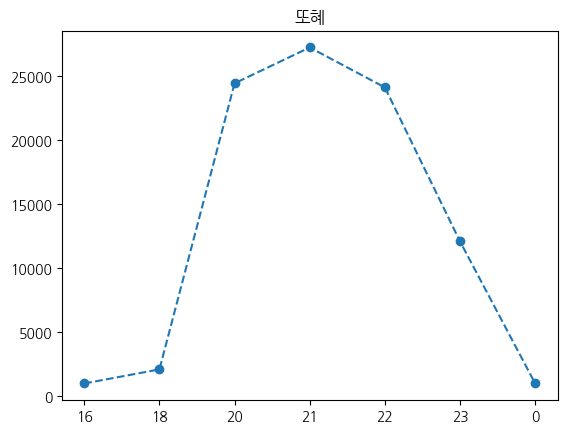

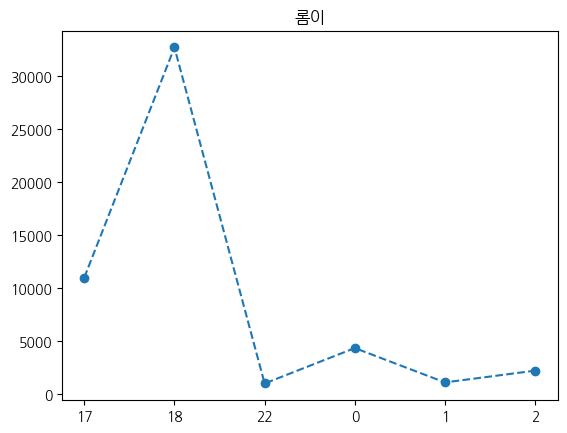

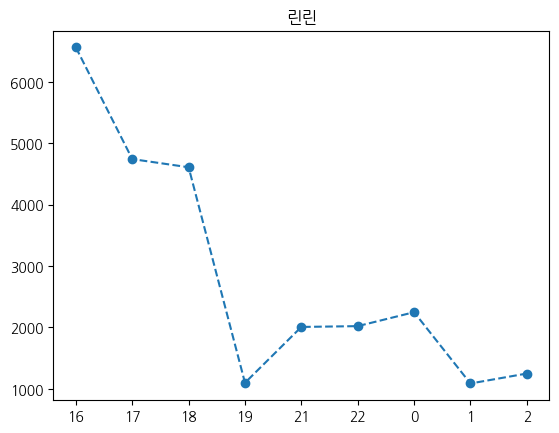

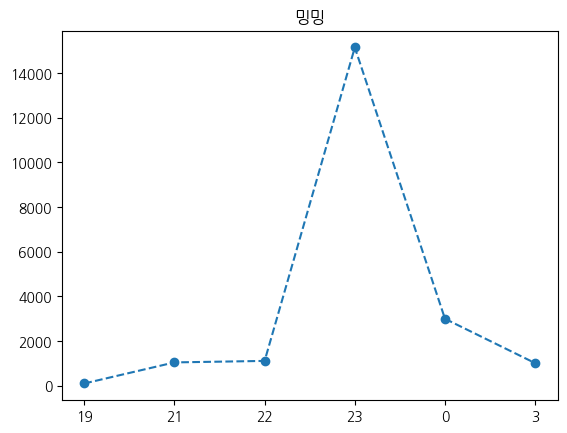

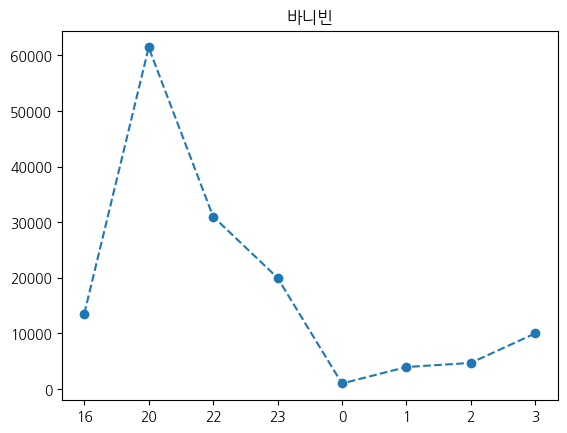

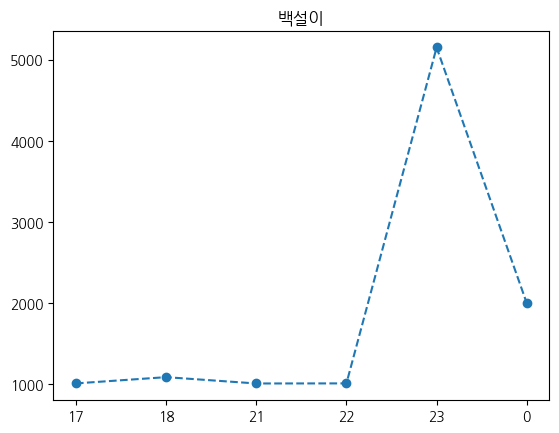

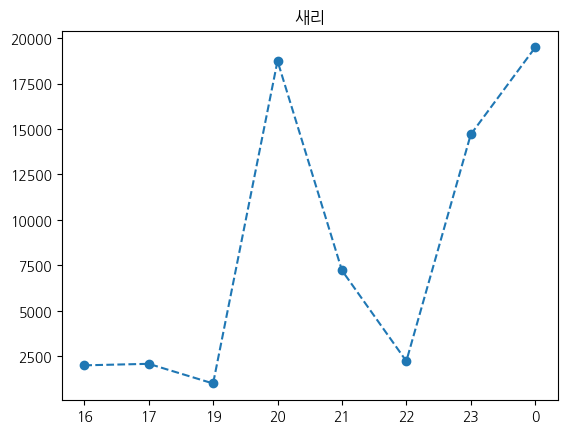

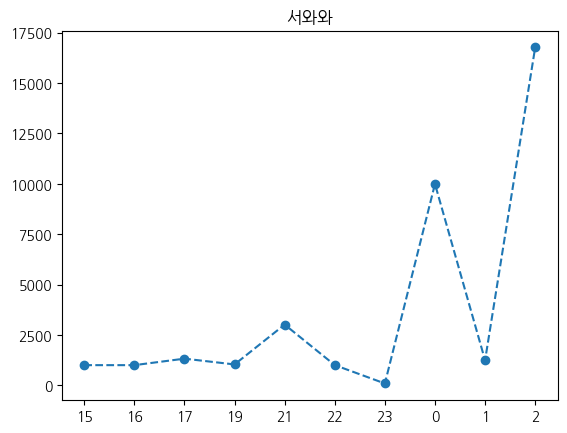

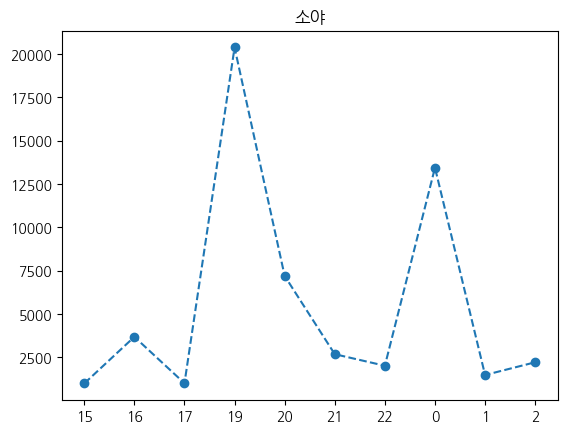

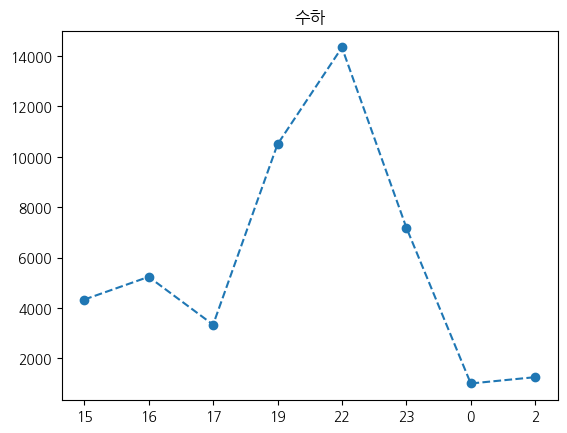

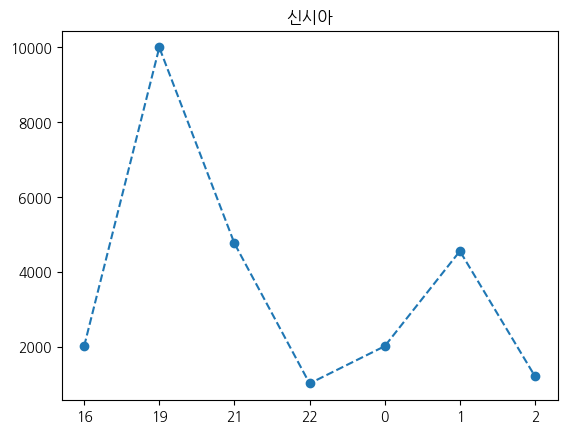

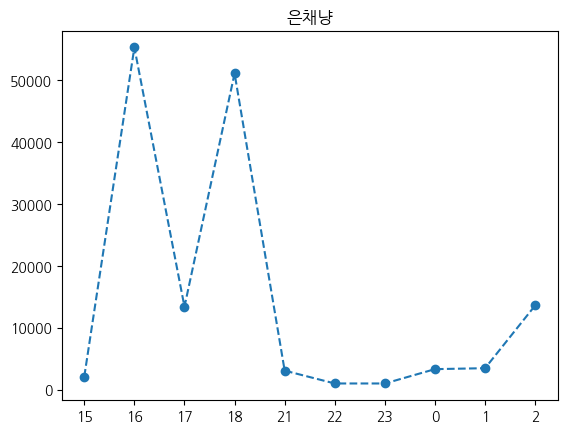

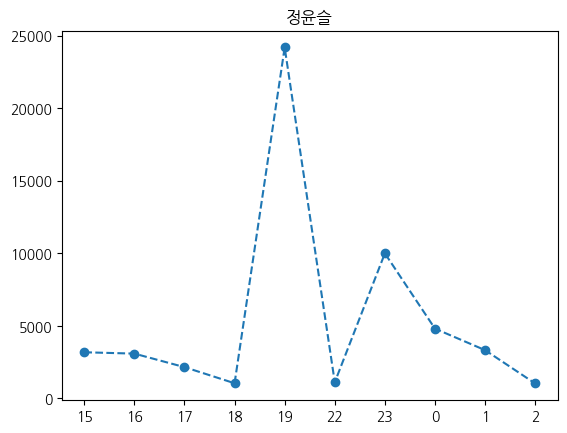

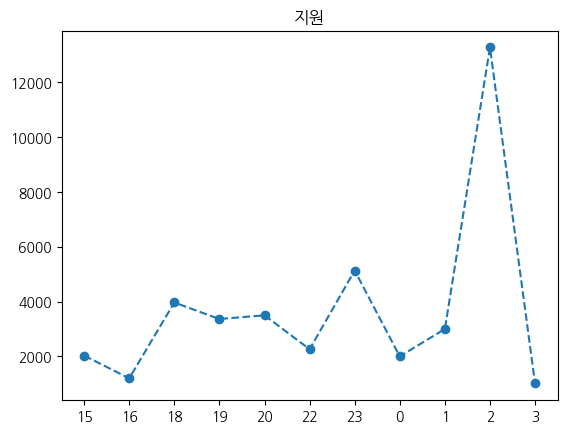

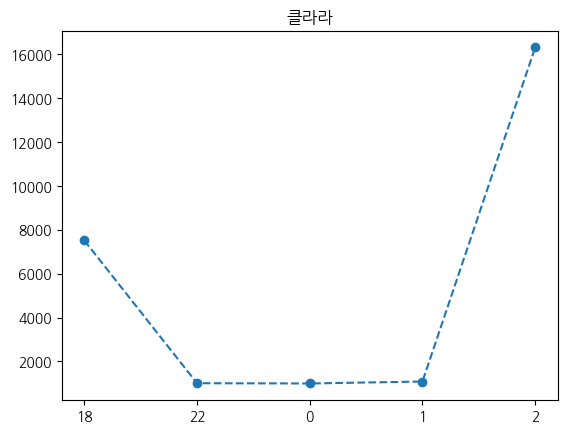

In [13]:
for i in BJ_list:
    BJ_time_df = re_df[re_df['참여BJ']==i].groupby(['day','hour'])['후원하트'].sum().reset_index()
    plt.plot(BJ_time_df['hour'],BJ_time_df['후원하트'],linestyle='--',marker='o')
    plt.title(i)
    plt.show()

## 5. 시청자별 하트후원 시계열 그래프

*⛧★⭐동탄큰손➷


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9959 (\N{INVERTED PENTAGRAM}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


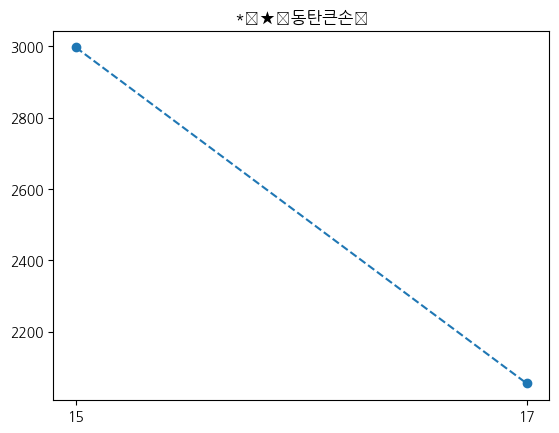

*⛧★소다⭐동탄큰손➷


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9959 (\N{INVERTED PENTAGRAM}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


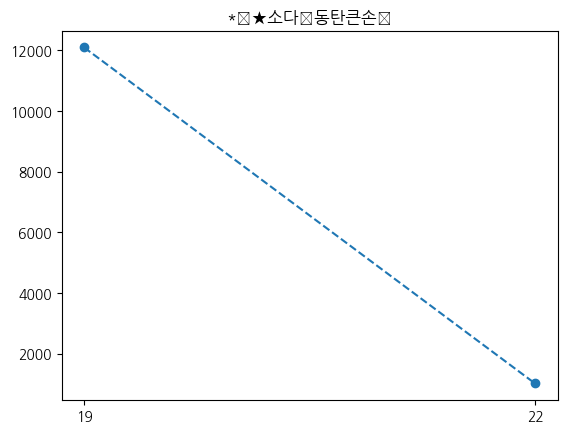

ON⁀➷⭐OFF


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8256 (\N{CHARACTER TIE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


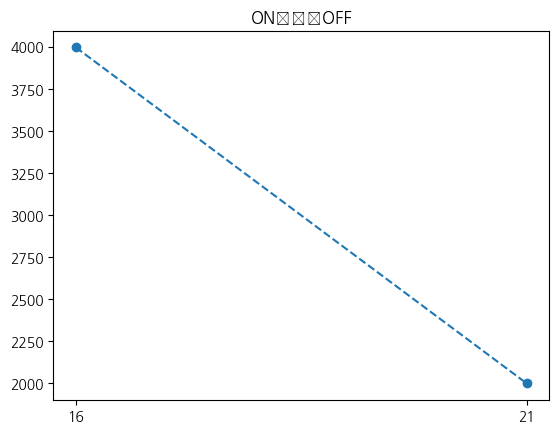

QP➳백설이아포❤️서방


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10163 (\N{WHITE-FEATHERED RIGHTWARDS ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


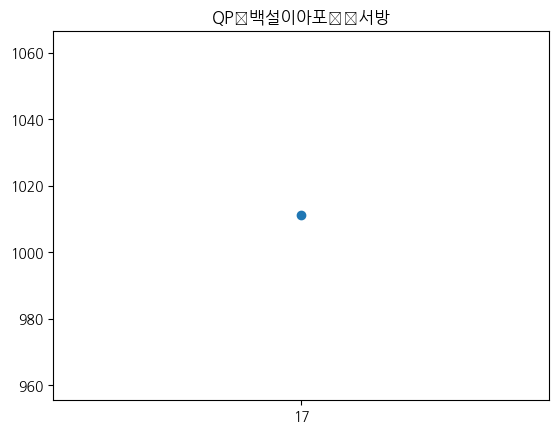

YB예삐♡건빵추천♡


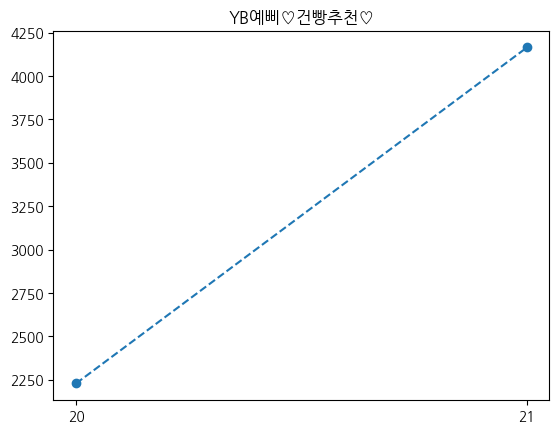

ZO지GO


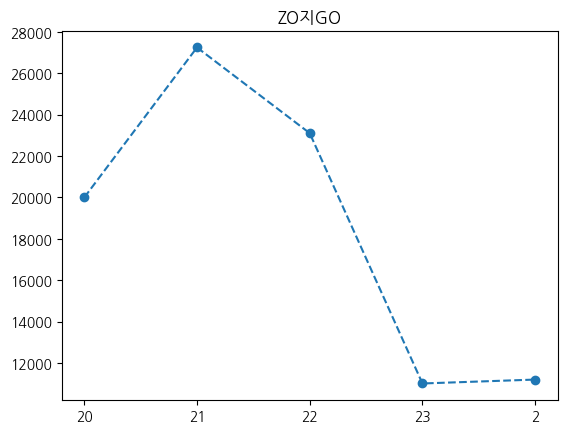

ෆ젖문가ෆ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)


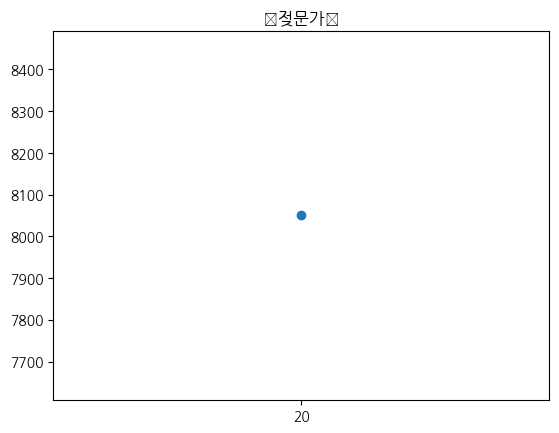

ღ강빈구ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


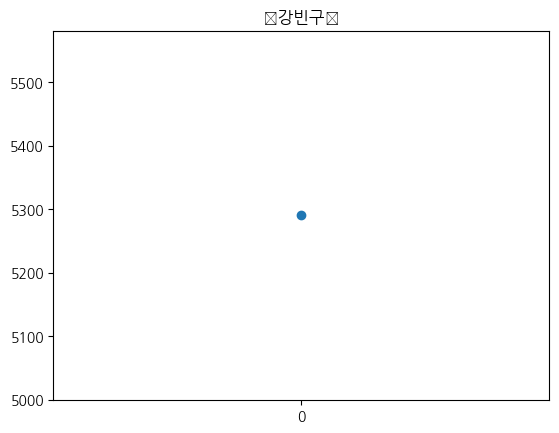

ღ롬이ღ아크


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


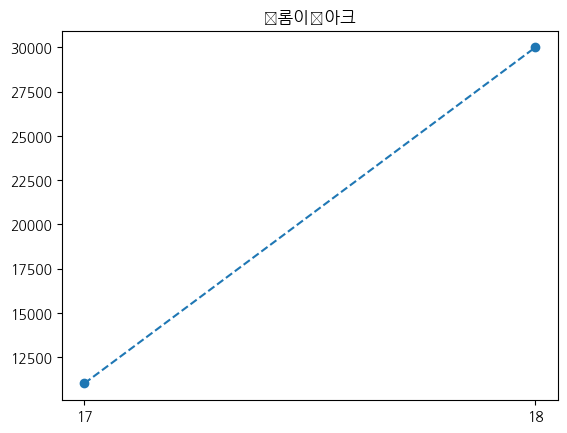

ღ롬이ღ예쁘다


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


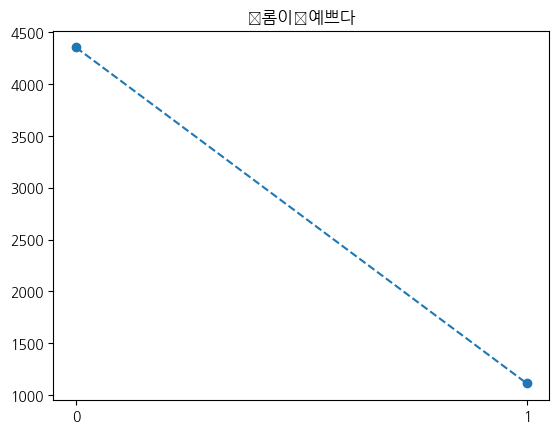

ღ린린ღ⭐클링크⭐


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


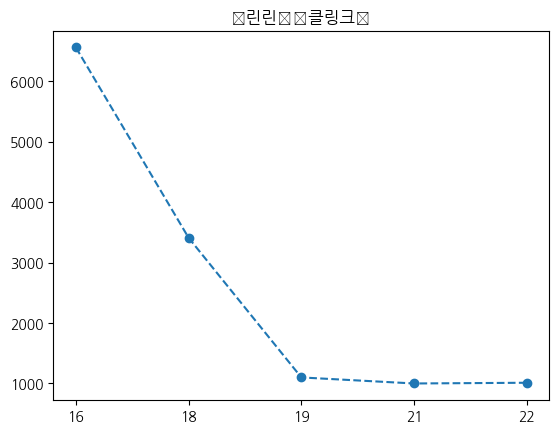

ღ새리웅니와따ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


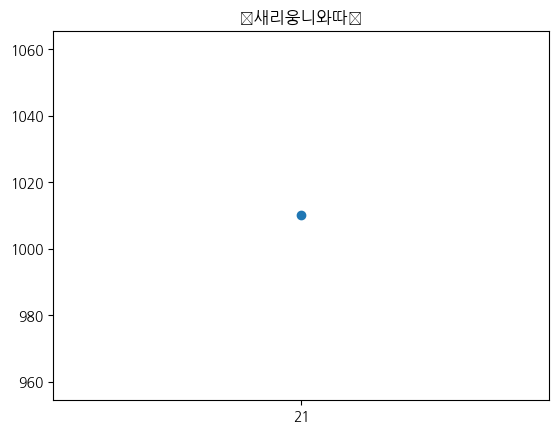

ღ세린ღ시착이™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


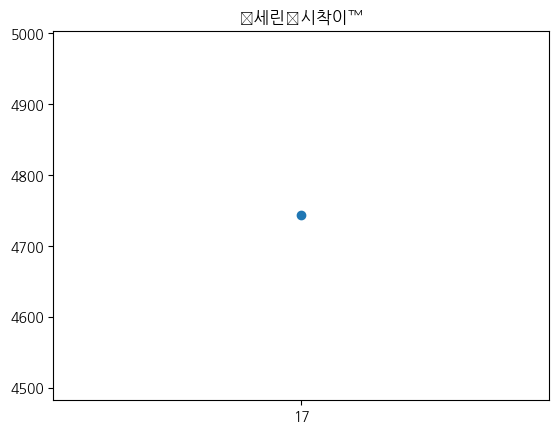

ღ울림ღ이네부회장◡멀쉬


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9697 (\N{LOWER HALF CIRCLE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


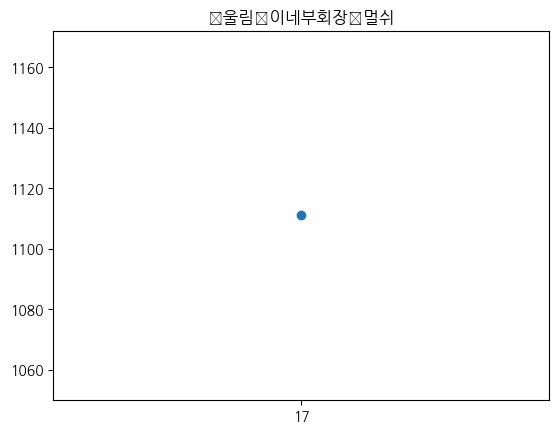

☆초이


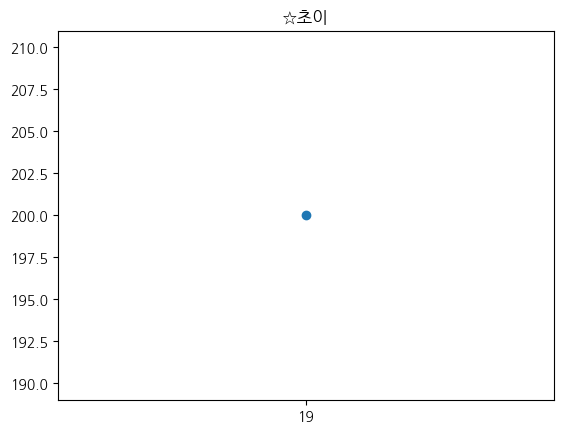

☆혼자뜨는별☆


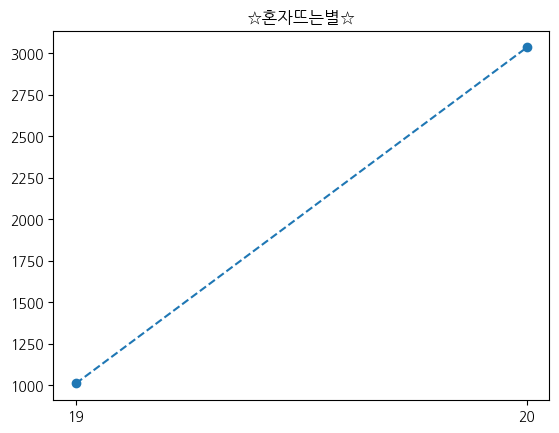

♥BOHEM


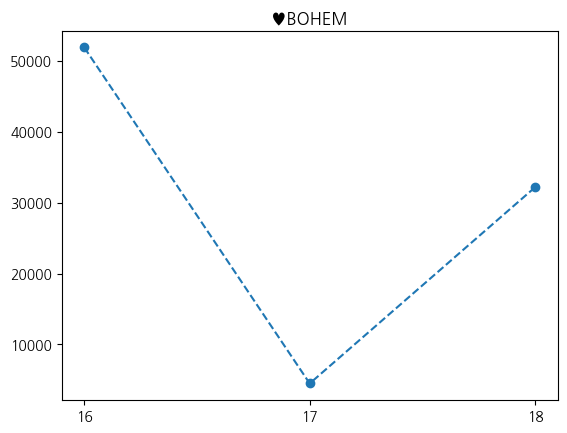

✦백야✦™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10022 (\N{BLACK FOUR POINTED STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


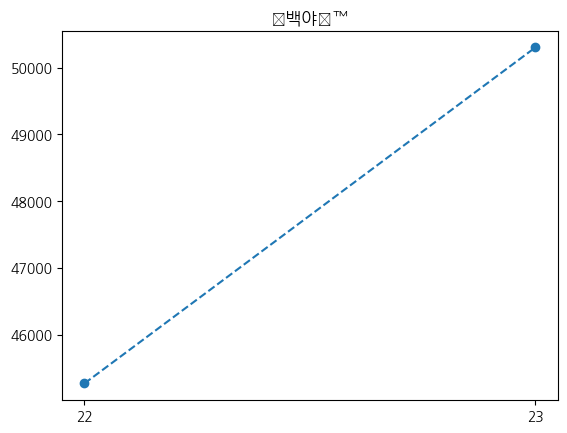

✨Reserve™✨


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


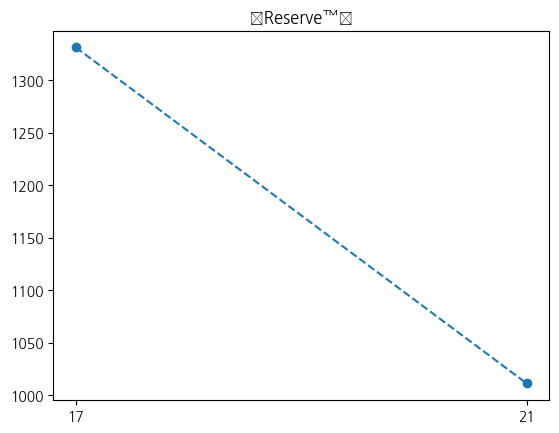

✨~뇌졸증~✨


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


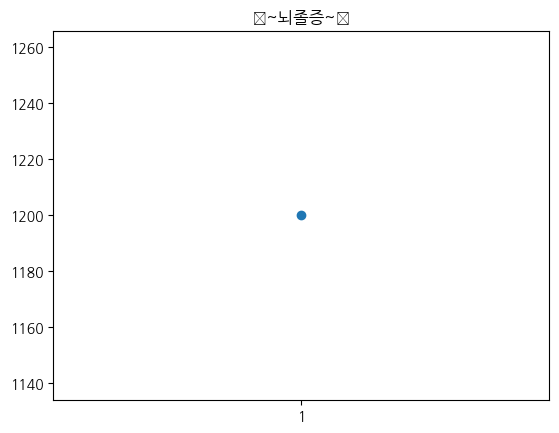

✨주군잃은⭐호랑✨


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


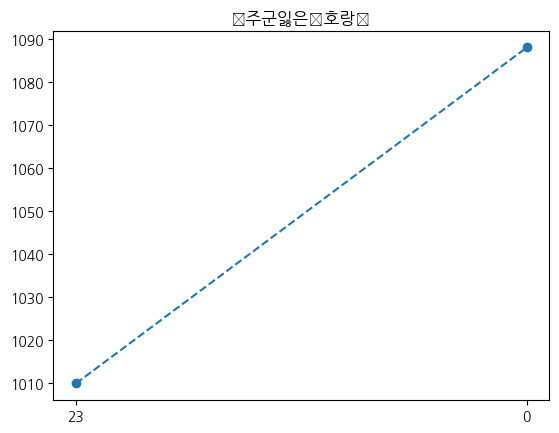

✨주군찾는❤️Milk✨


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


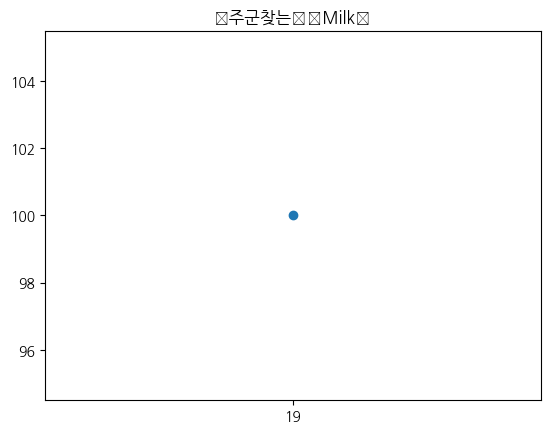

✿신시아✿⁀샤코™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10047 (\N{BLACK FLORETTE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8256 (\N{CHARACTER TIE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


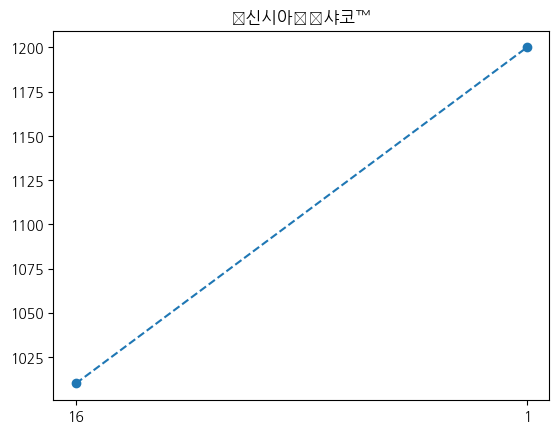

❤️베니의미키™❤️


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


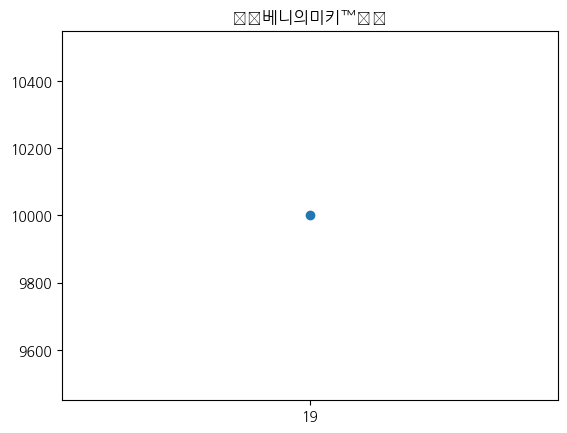

❥1010나연❤️하꼬레이


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


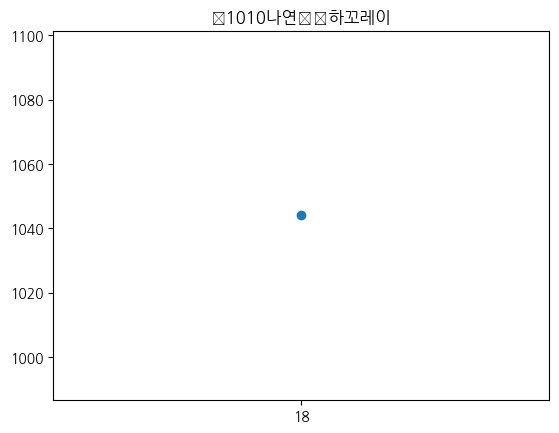

❥니야


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


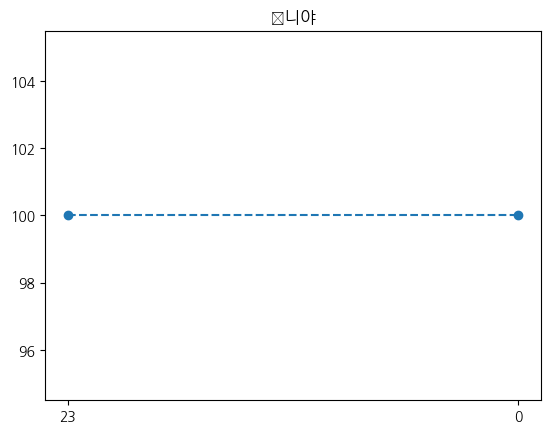

➷⭐안마여수갓™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


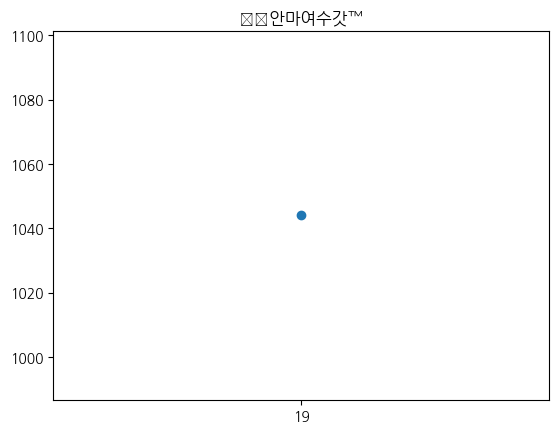

⭐금지™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


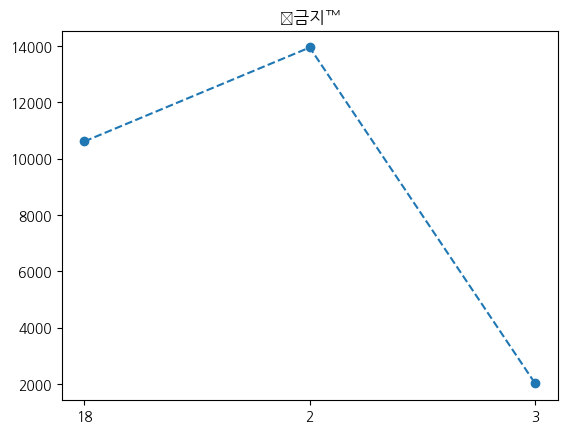

《《《YB인천사랑》》》


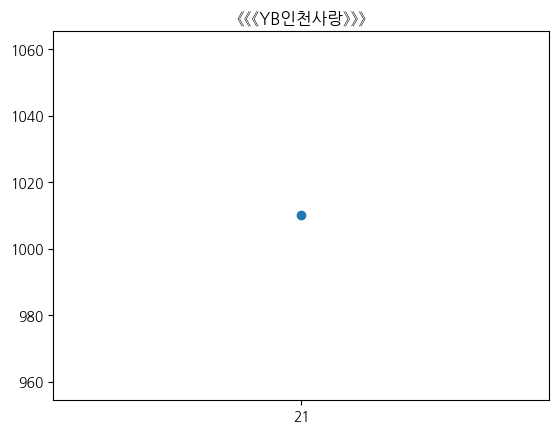

강철의야수⛧타임머슴


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9959 (\N{INVERTED PENTAGRAM}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


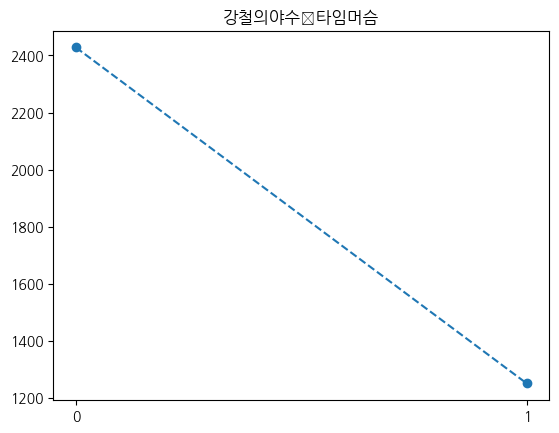

국산늑대_


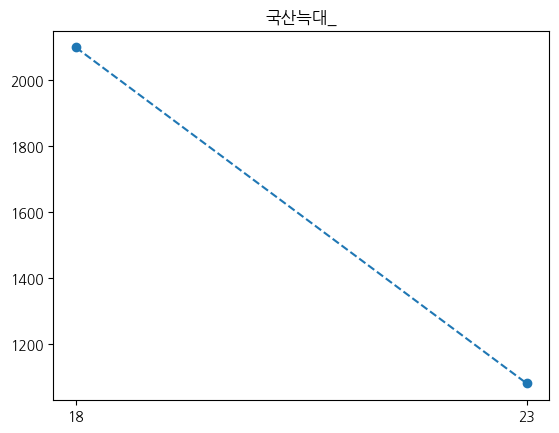

그냥유니+츄달선


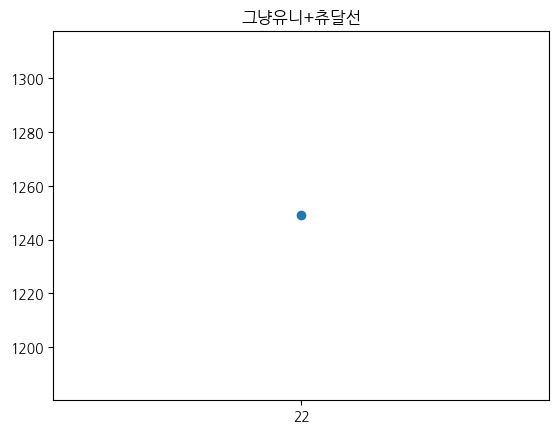

그녀의황태자


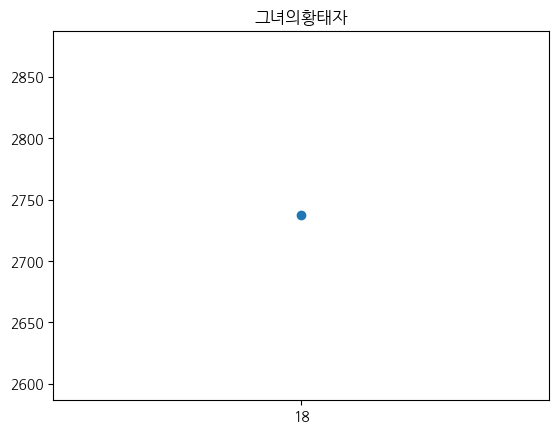

깨리ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


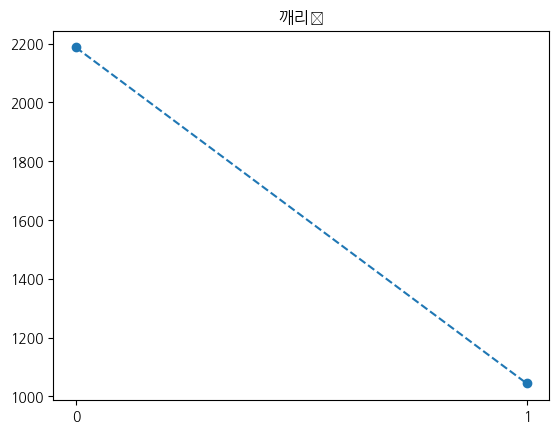

깨리네⚡머네로


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


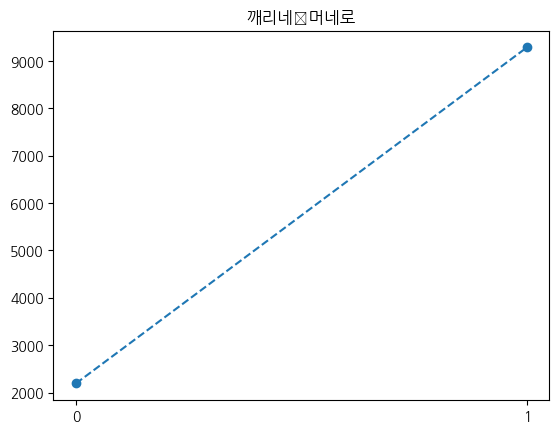

나오PANDA


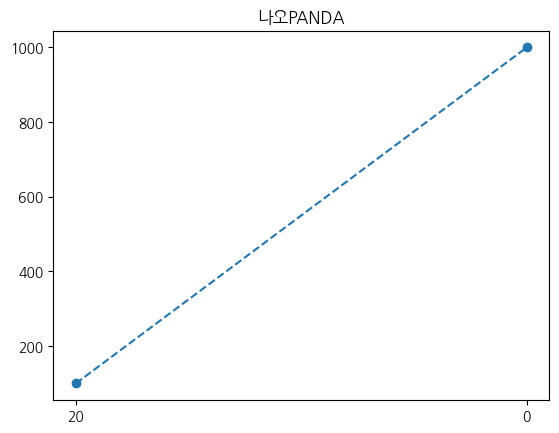

눈먼천사


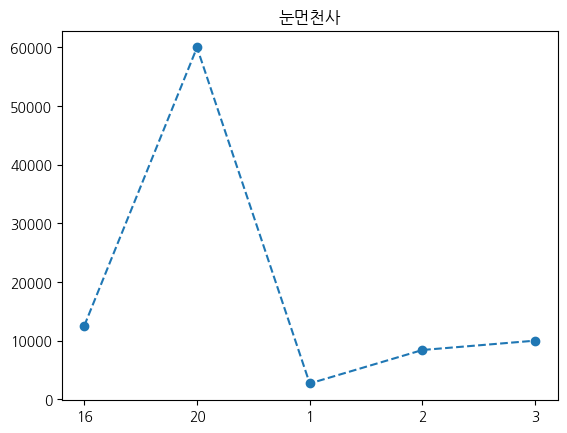

드래곤볼터치


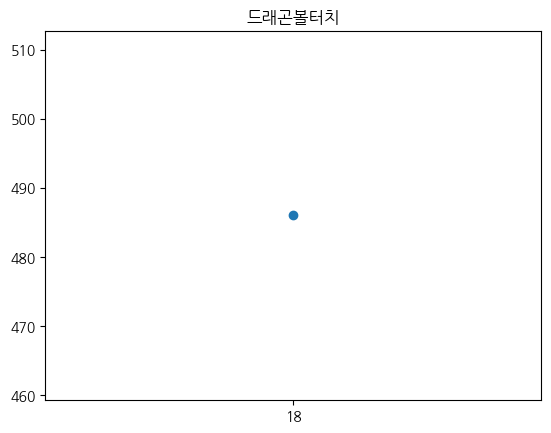

라도바라기ღ절밥먹는목사


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


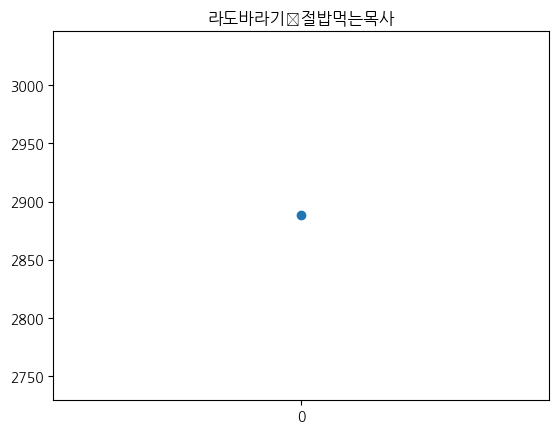

릴리❤️스카이


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


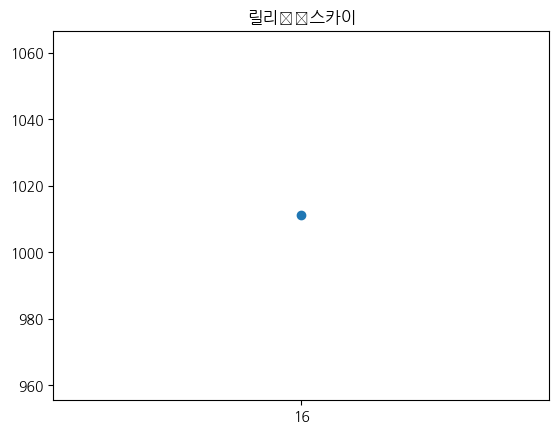

미키™AI


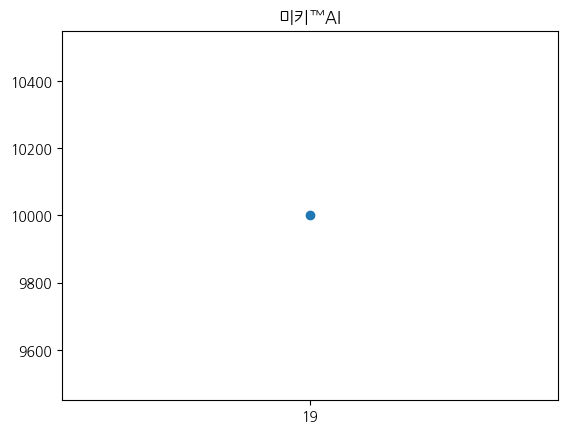

백호제로46


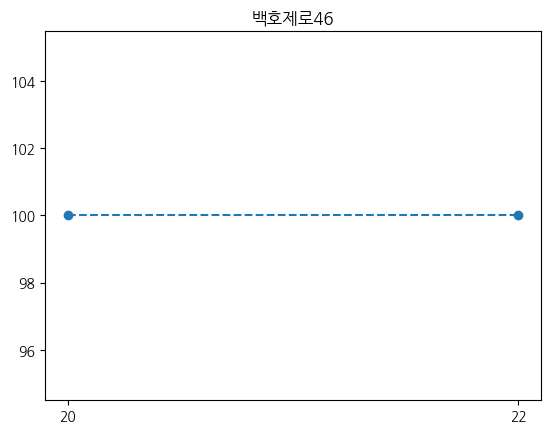

붘칰밬칰


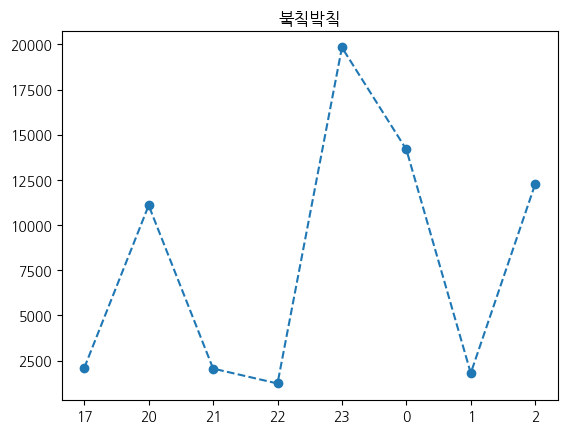

비키♡LIMITED™


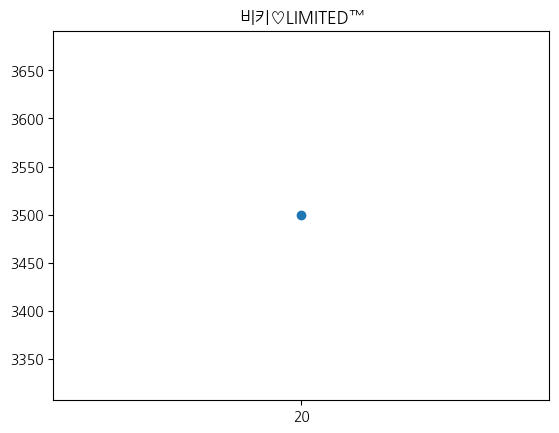

소야♡파이


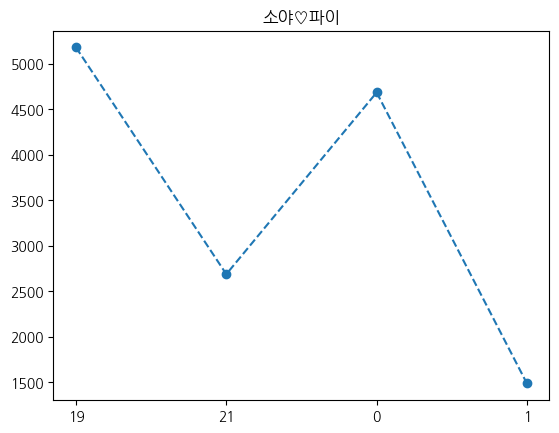

소야♡푸시


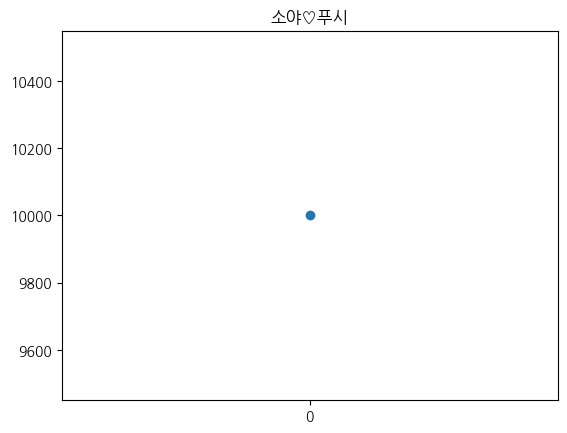

수하의충성스런개


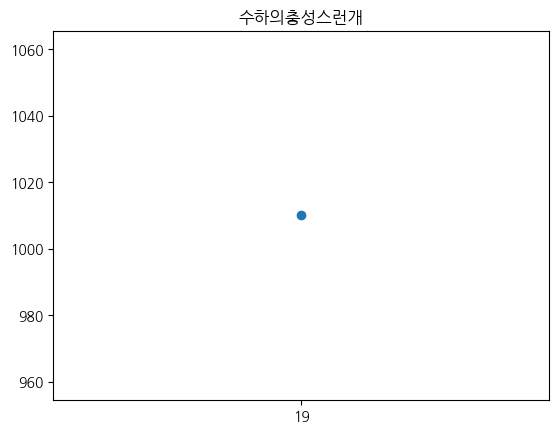

술고래파이


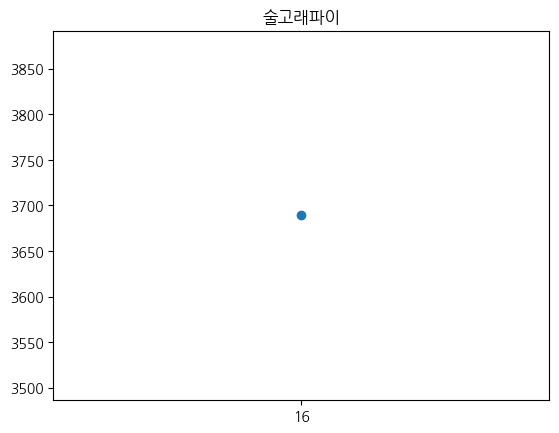

슈발지원❥니야


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


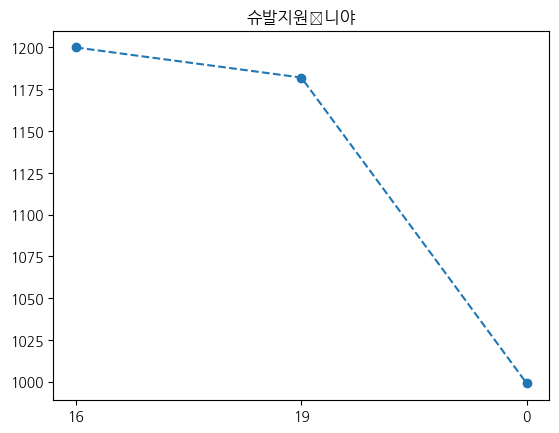

양재열


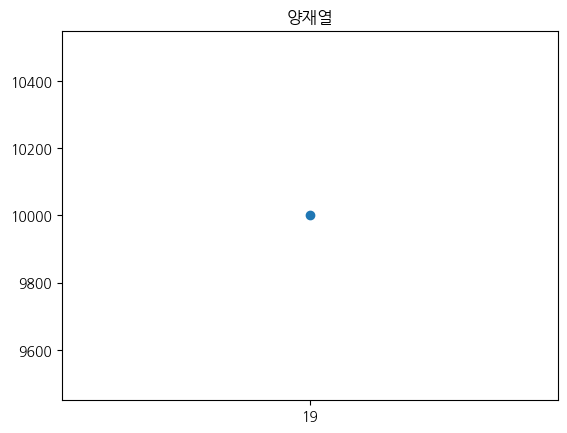

윤슬❤️그지별루다*⁀➷ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8256 (\N{CHARACTER TIE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtool

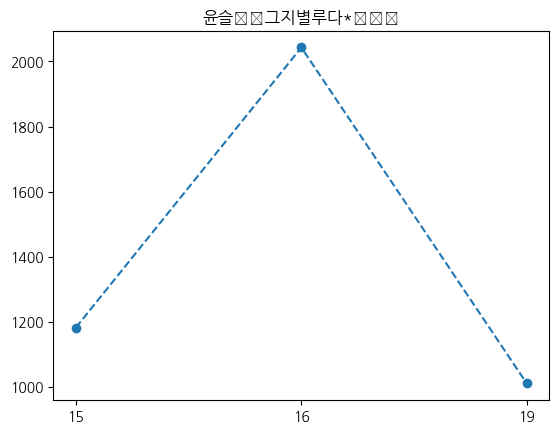

은채궁에하트터는김루팡


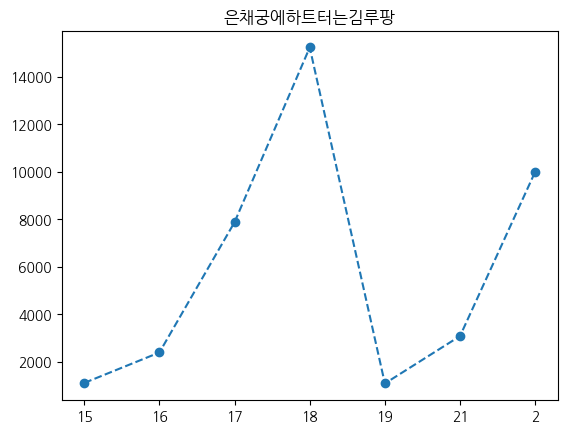

이제수하없이못사는ღ샤린


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


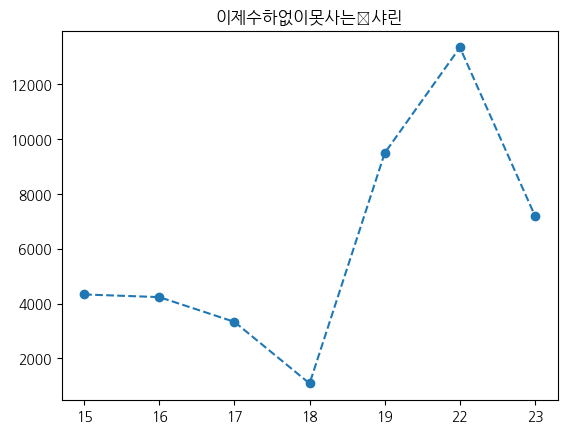

작살박살


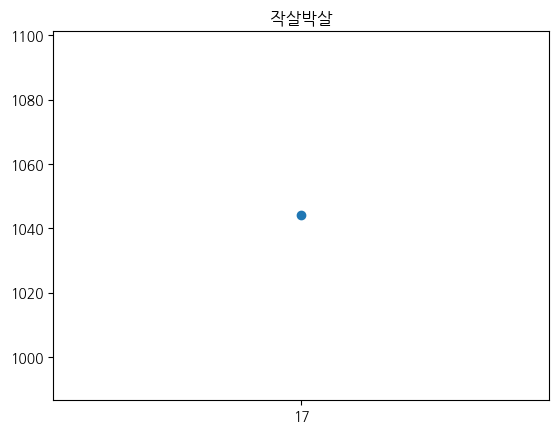

장금길


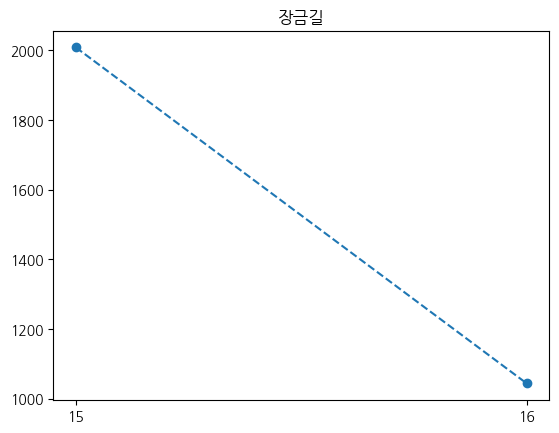

정윤슬➳❥독사단꼰데™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10163 (\N{WHITE-FEATHERED RIGHTWARDS ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


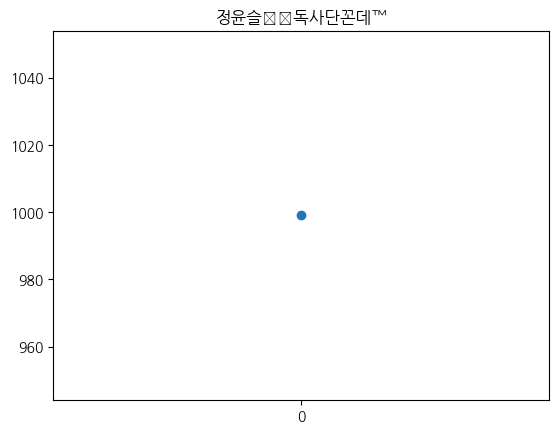

지나가버린사람


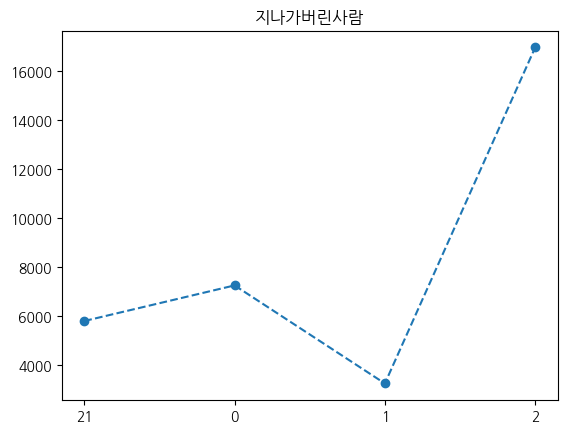

지원❥도끼맛바카스™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


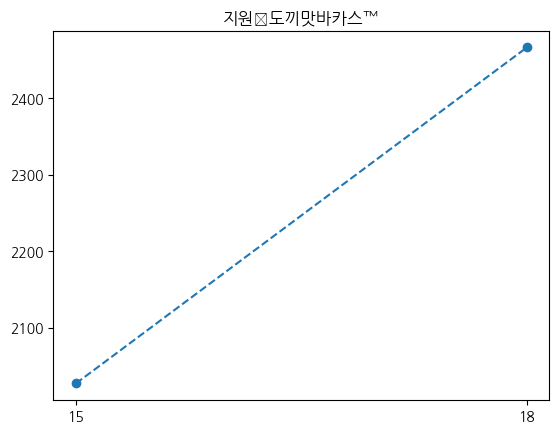

지원이꺼♥커피


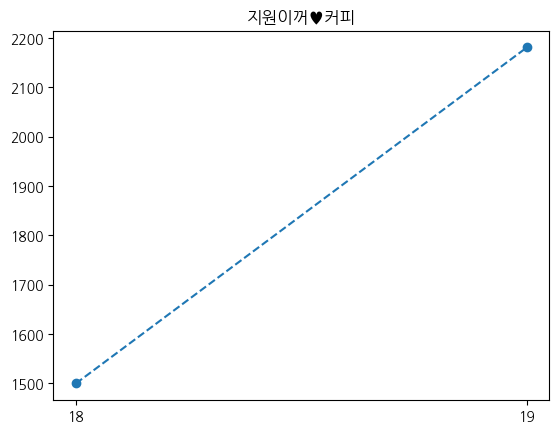

쫄보b


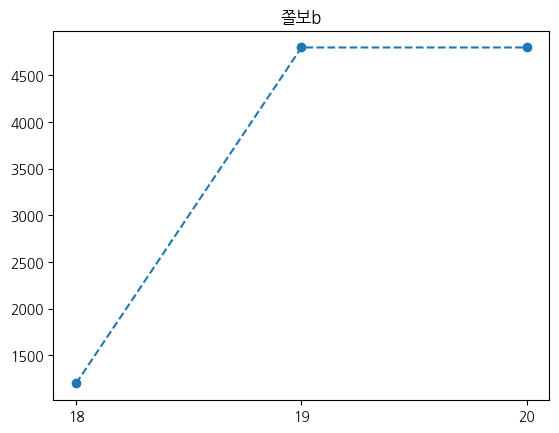

테라카쓰


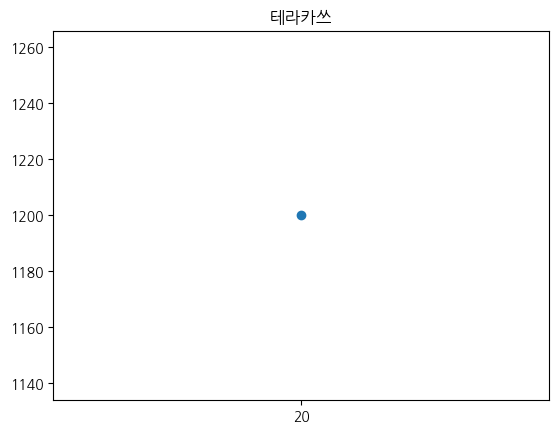

트리⛧


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9959 (\N{INVERTED PENTAGRAM}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


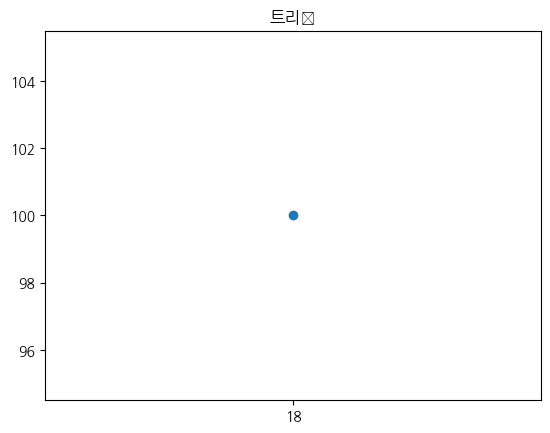

플러팅하는지원❥니야


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


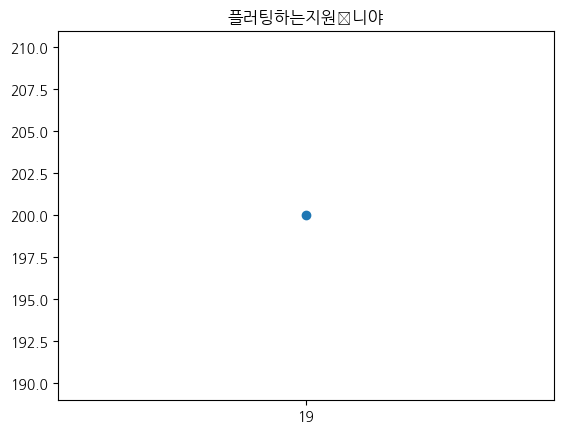

한가을ღ유깡


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


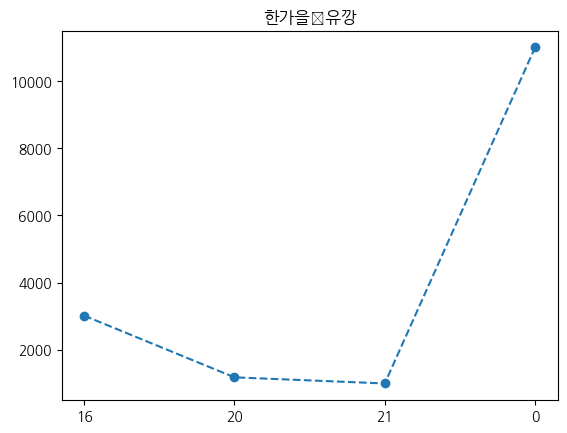

현생가용


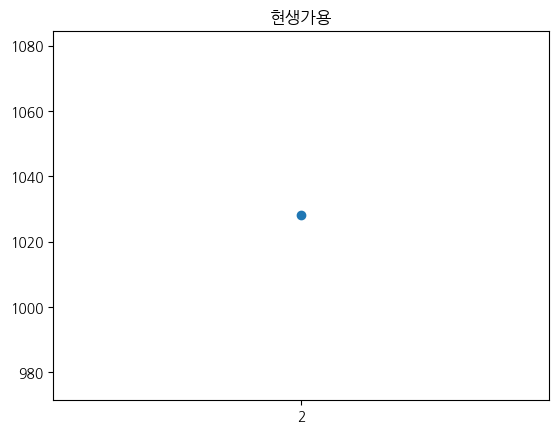

In [14]:
for i in VIP_list:
    VIP_time_df = re_df[re_df['후원 아이디(닉네임)']==i].groupby(['day','hour'])['후원하트'].sum().reset_index()
    print(i)
    plt.plot(VIP_time_df['hour'],VIP_time_df['후원하트'],linestyle='--',marker='o')
    plt.title(i)
    plt.show()

In [15]:
re_df2 = re_df.set_index('후원시간')

In [16]:
df_10m = pd.DataFrame()

df_10m['min'] = re_df2.후원하트.resample('10T').min()
df_10m['max'] = re_df2.후원하트.resample('10T').max()
df_10m['mean'] = re_df2.후원하트.resample('10T').mean()
df_10m['median'] = re_df2.후원하트.resample('10T').median()
df_10m['sum'] = re_df2.후원하트.resample('10T').sum()

/tmp/ipykernel_68045/916355910.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['min'] = re_df2.후원하트.resample('10T').min()
/tmp/ipykernel_68045/916355910.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['max'] = re_df2.후원하트.resample('10T').max()
/tmp/ipykernel_68045/916355910.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['mean'] = re_df2.후원하트.resample('10T').mean()
/tmp/ipykernel_68045/916355910.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['median'] = re_df2.후원하트.resample('10T').median()
/tmp/ipykernel_68045/916355910.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['sum'] = re_df2.후원하트.resample('10T').sum()


In [17]:
df_10m

,min,max,mean,median,sum
후원시간,,,,,
2024-09-22 15:10:00,999.0,3333.0,1465.800000,999.0,7329
2024-09-22 15:20:00,1182.0,1182.0,1182.000000,1182.0,1182
2024-09-22 15:30:00,999.0,1028.0,1013.500000,1013.5,2027
2024-09-22 15:40:00,NaN,NaN,NaN,NaN,0
2024-09-22 15:50:00,999.0,1111.0,1039.666667,1009.0,3119
...,...,...,...,...,...
2024-09-23 02:20:00,1011.0,3689.0,2031.000000,2222.0,10155
2024-09-23 02:30:00,2352.0,3618.0,2985.000000,2985.0,5970
2024-09-23 02:40:00,1028.0,10000.0,3624.250000,1734.5,14497


## 6. 10분 집계당 시계열 통계 그래프

min


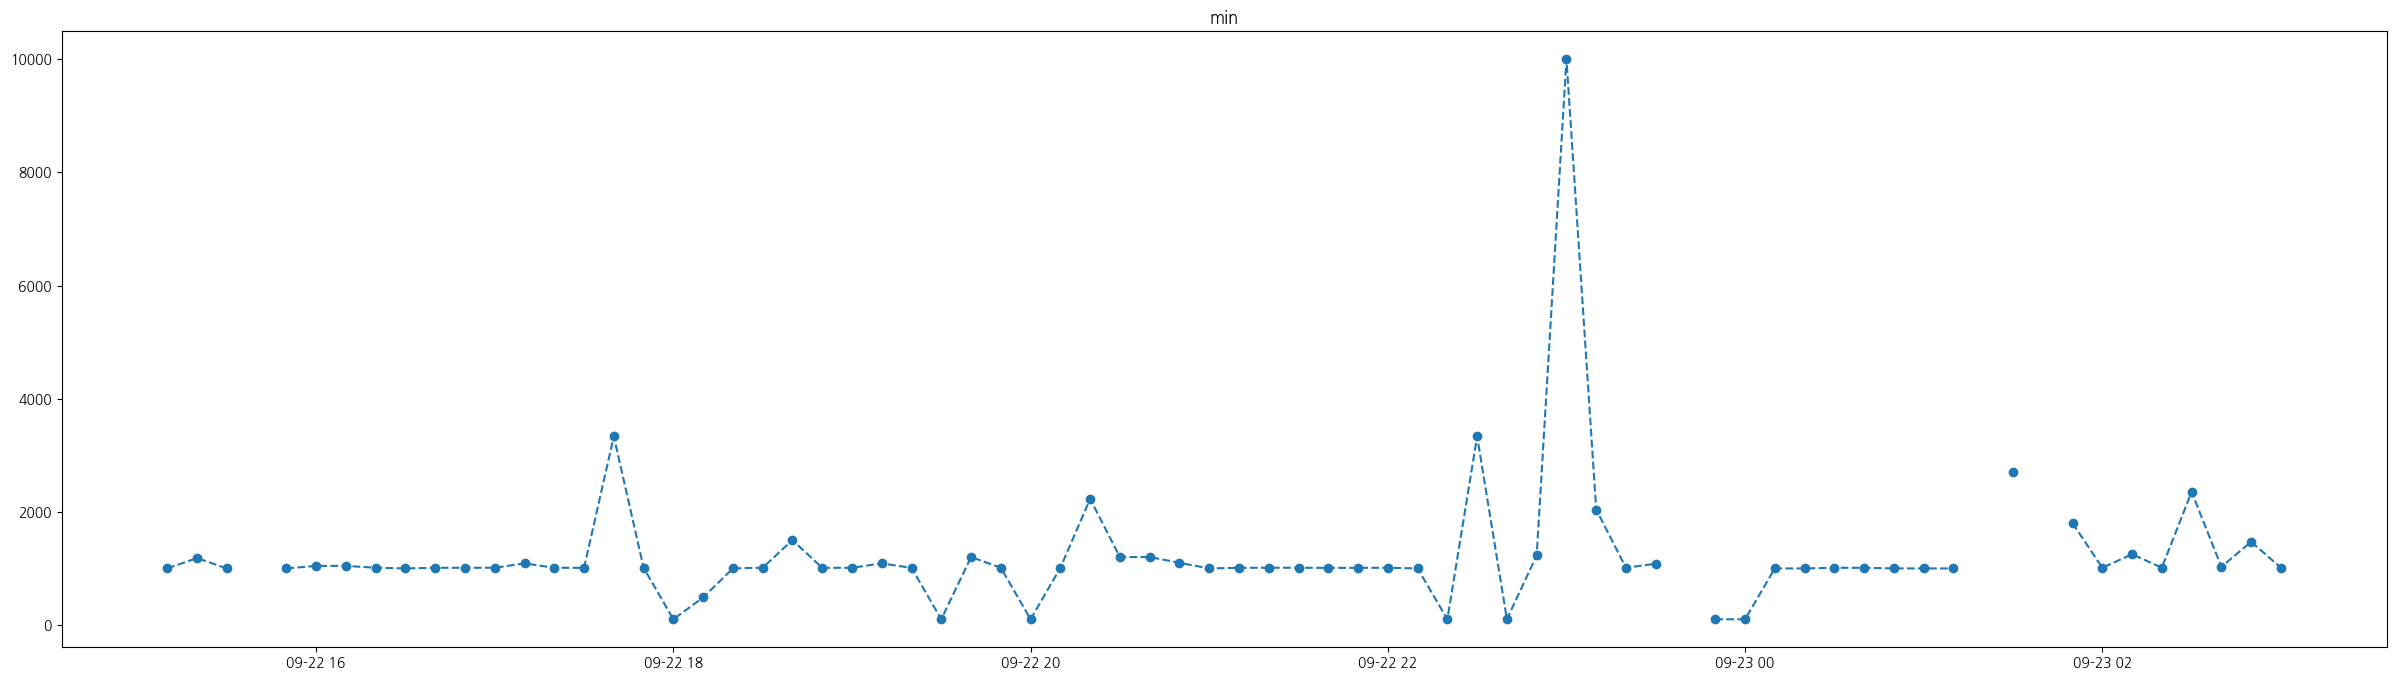

max


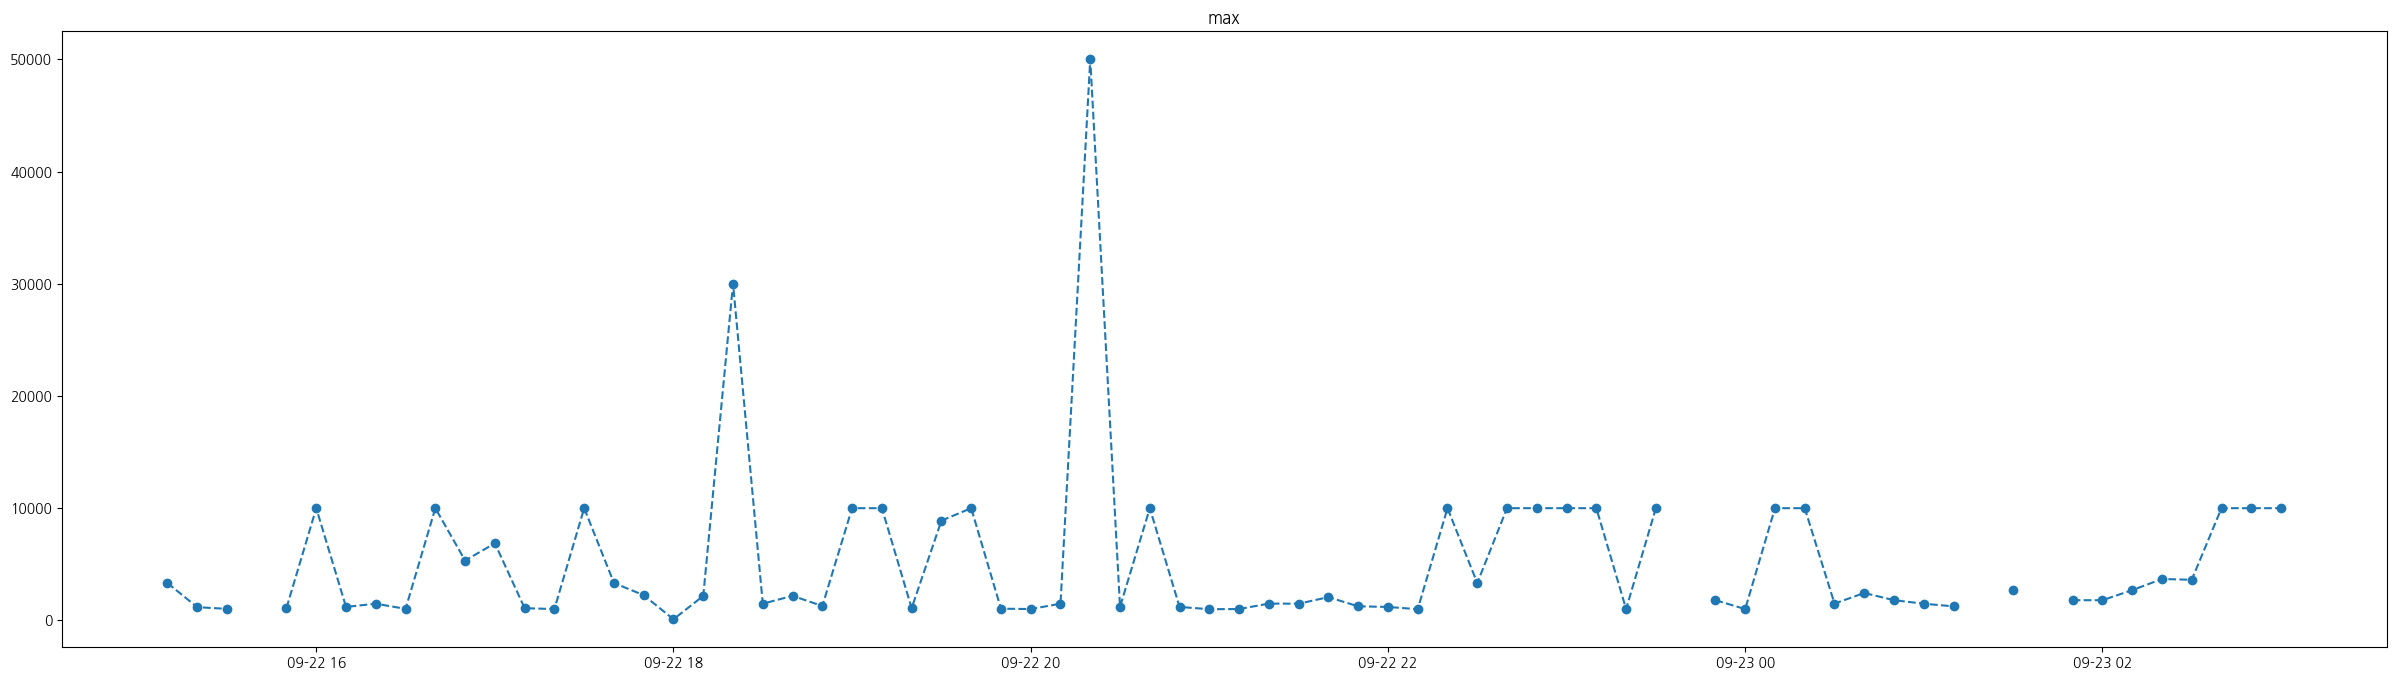

mean


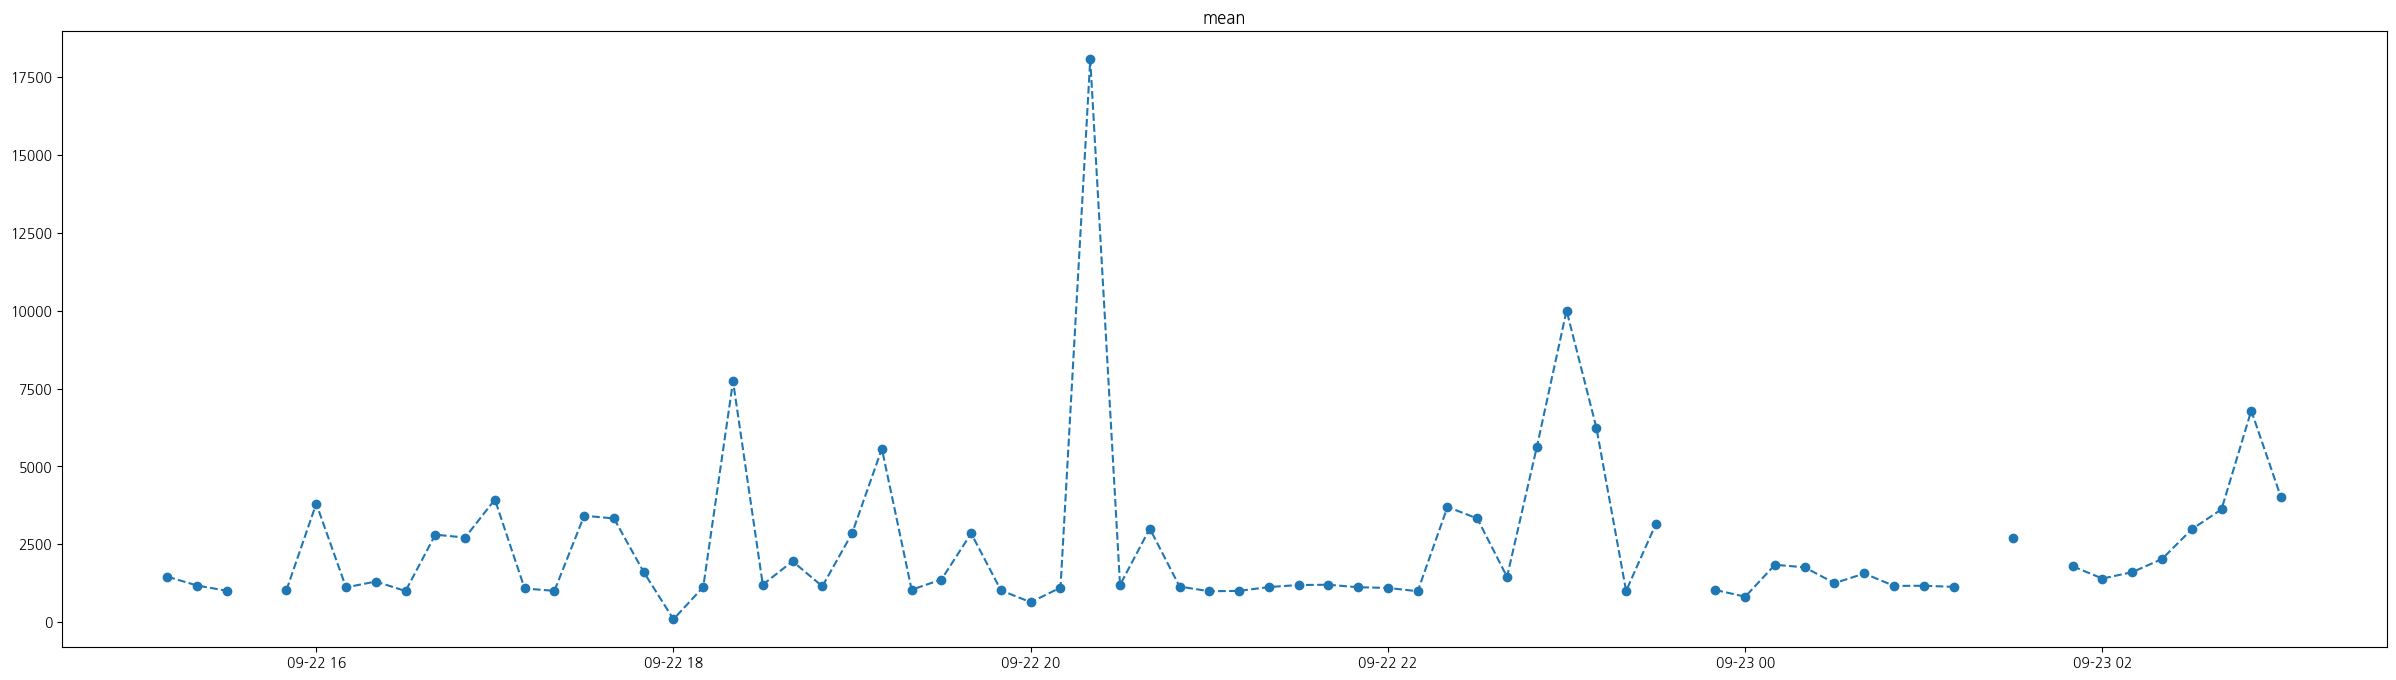

median


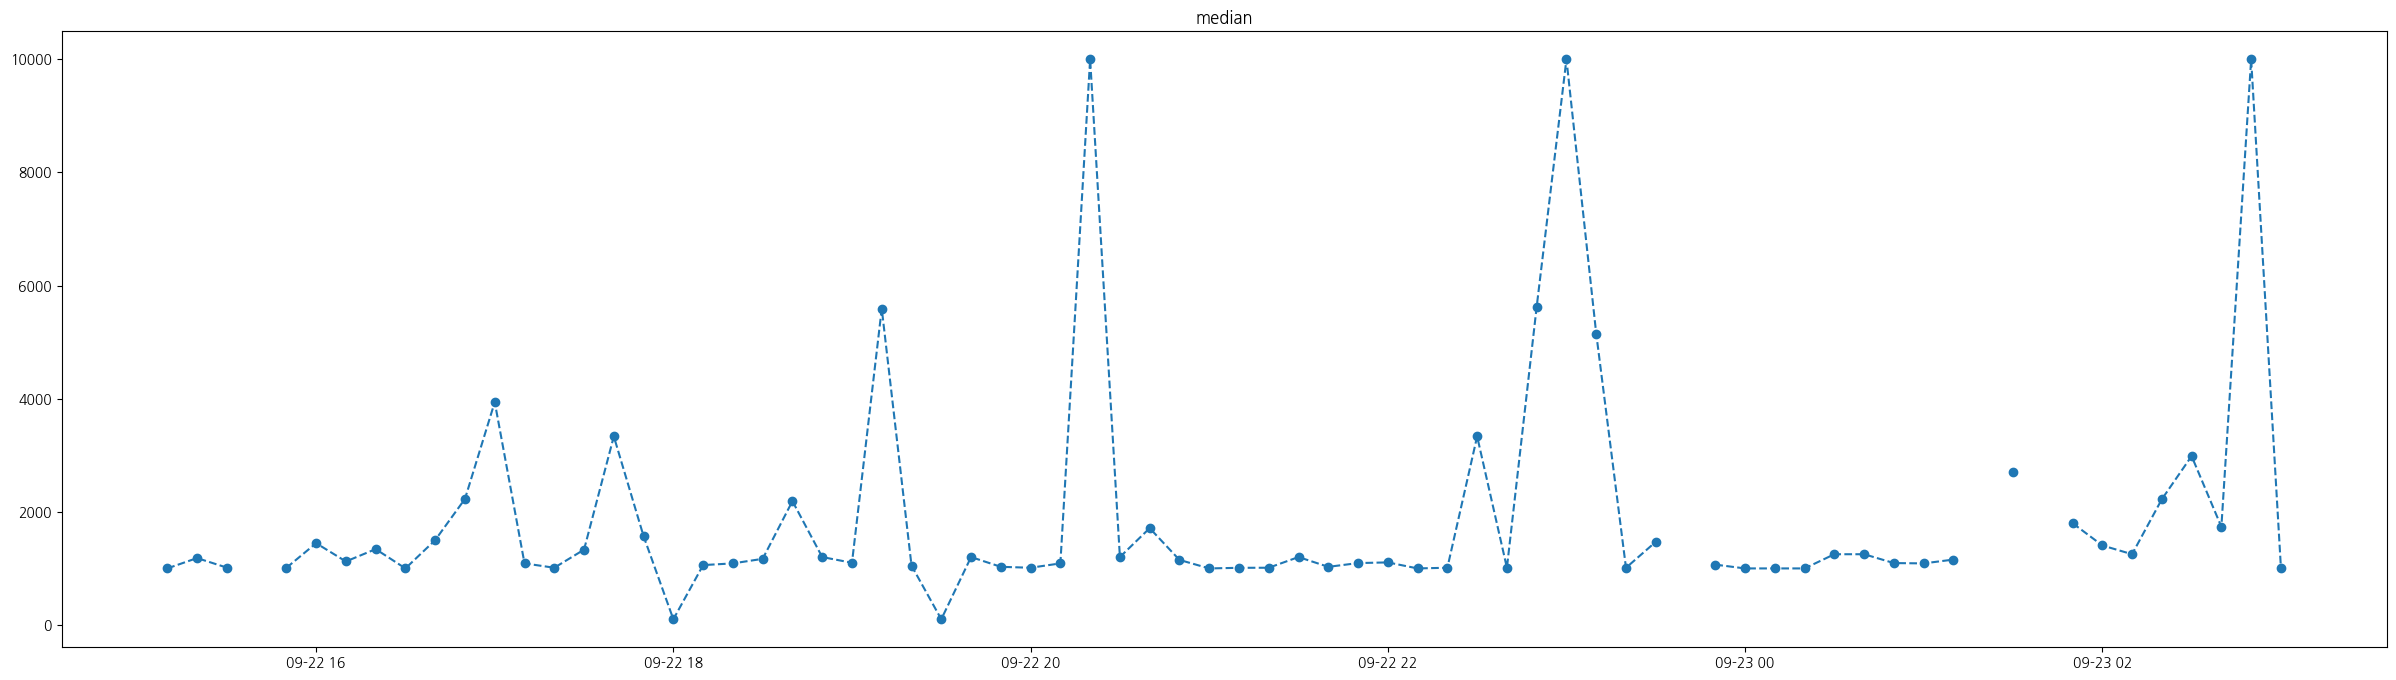

sum


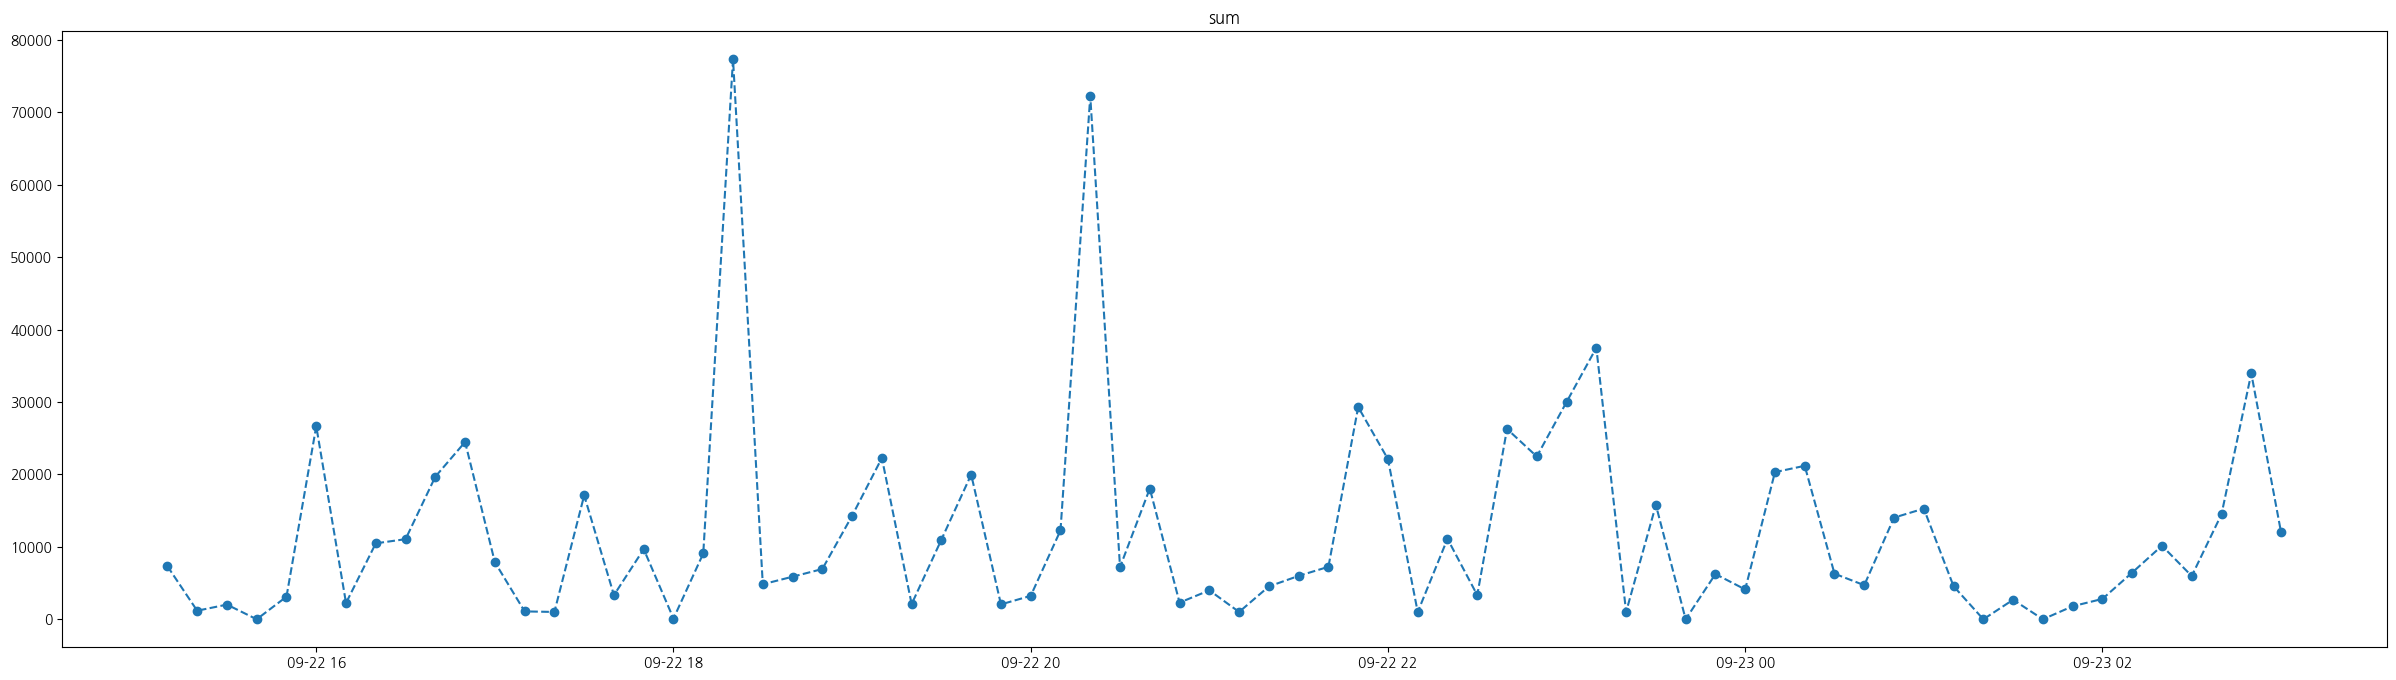

In [18]:
for i in list(df_10m.columns):
    print(i)
    plt.figure(figsize=(30,8))
    plt.plot(df_10m[i],linestyle='--',marker='o')
    plt.title(i)
    plt.show()